<a href="https://colab.research.google.com/github/Tack-Theerapat/Prediction_fares_of_NYC/blob/main/Prediction_fares_of_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

‡∏Å‡∏î‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏ó‡∏≤‡∏á‡∏•‡∏±‡∏î‡πÑ‡∏õ‡∏¢‡∏±‡∏á‡πÑ‡∏î‡∏£‡πå ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏≠‡πà‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
https://drive.google.com/drive/folders/1yt-tfFzzUow5haV1TUYtsXph5wJuiKaM?usp=share_link

Souce : https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

# **Update and Dowload data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop2.tgz
!tar xf spark-3.3.1-bin-hadoop2.tgz
!pip install -q findspark
!pip install pyspark

#Install extra lib(s)
!pip install -q xlrd
!pip install -q kaggle
!pip install -q kora

#import and set environment for spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop2"

import kora
import pandas as pd

import findspark
findspark.init()
from pyspark import SparkContext
# from pyspark.sql import SparkSession
from pyspark.sql import *
from pyspark.sql.functions import *

SPARK_URL = "local[*]"

spark = SparkSession.builder.master(SPARK_URL).getOrCreate()

# Check the pyspark version
import pyspark
print(pyspark.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 281.4 MB 51 kB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 199 kB 79.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=cc7954f63330c3f6245f9dd02ce4e863debd992aa52a8fd38d4ef501fb853e3c
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 57 kB 4.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.6 MB 22.6 MB/s 
3.3.1


Install Libs

In [ ]:
!pip install -q pyspark_dist_explore
!pip install -q matplotlib
!pip install -q numpy

In [ ]:
import pandas as pd
import numpy as np
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML, display_html #usefull to display wide tables
from pyspark_dist_explore import Histogram, hist, distplot, pandas_histogram
from pyspark.sql import Row

from pyspark.sql.functions import lit
from pyspark import SparkConf
from pyspark import SparkContext
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

#sc = pyspark.SparkContext()
sqlContext = pyspark.SQLContext(sc)
%matplotlib inline

/content/spark-3.3.1-bin-hadoop2/python/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:

# !gdown --id 1yt-tfFzzUow5haV1TUYtsXph5wJuiKaM?usp=sharing
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
# !kaggle datasets download -d theerapatphat/nycforbigdatasubject
# !unzip /content/nyc-tlc-data.zip  && rm /content/nyc-tlc-data.zip

In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

In [ ]:
SPARK_URL = "local[*]"
spark = SparkSession.builder.master(SPARK_URL).getOrCreate()
spark

In [ ]:
sqlContext = SQLContext(spark)
#/content/gdrive/MyDrive/NYC

# --------------------------------------**Old Section**------------------------------------

# **data path**

**2017**

In [ ]:
df1701 = "/content/gdrive/MyDrive/NYC/2017/yellow_tripdata_2017-01.parquet"
df1702 = '/content/gdrive/MyDrive/NYC/2017/yellow_tripdata_2017-02.parquet'
df1703 = '/content/gdrive/MyDrive/NYC/2017/yellow_tripdata_2017-03.parquet'
df1704 = '/content/gdrive/MyDrive/NYC/2017/yellow_tripdata_2017-04.parquet'
df1705 = '/content/gdrive/MyDrive/NYC/2017/yellow_tripdata_2017-05.parquet'
df1706 = '/content/gdrive/MyDrive/NYC/2017/yellow_tripdata_2017-06.parquet'
df1707 = '/content/gdrive/MyDrive/NYC/2017/yellow_tripdata_2017-07.parquet'
df1708 = '/content/gdrive/MyDrive/NYC/2017/yellow_tripdata_2017-08.parquet'
df1709 = '/content/gdrive/MyDrive/NYC/2017/yellow_tripdata_2017-09.parquet'
df1710 = '/content/gdrive/MyDrive/NYC/2017/yellow_tripdata_2017-10.parquet'
df1711 = '/content/gdrive/MyDrive/NYC/2017/yellow_tripdata_2017-11.parquet'
df1712 = '/content/gdrive/MyDrive/NYC/2017/yellow_tripdata_2017-12.parquet'

**2018**

In [ ]:
df1801 = '/content/gdrive/MyDrive/NYC/2018/yellow_tripdata_2018-01.parquet'
df1802 = '/content/gdrive/MyDrive/NYC/2018/yellow_tripdata_2018-02.parquet'
df1803 = '/content/gdrive/MyDrive/NYC/2018/yellow_tripdata_2018-03.parquet'
df1804 = '/content/gdrive/MyDrive/NYC/2018/yellow_tripdata_2018-04.parquet'
df1805 = '/content/gdrive/MyDrive/NYC/2018/yellow_tripdata_2018-05.parquet'
df1806 = '/content/gdrive/MyDrive/NYC/2018/yellow_tripdata_2018-06.parquet'
df1807 = '/content/gdrive/MyDrive/NYC/2018/yellow_tripdata_2018-07.parquet'
df1808 = '/content/gdrive/MyDrive/NYC/2018/yellow_tripdata_2018-08.parquet'
df1809 = '/content/gdrive/MyDrive/NYC/2018/yellow_tripdata_2018-09.parquet'
df1810 = '/content/gdrive/MyDrive/NYC/2018/yellow_tripdata_2018-10.parquet'
df1811 = '/content/gdrive/MyDrive/NYC/2018/yellow_tripdata_2018-11.parquet'
df1812 = '/content/gdrive/MyDrive/NYC/2018/yellow_tripdata_2018-12.parquet'

**2019**

In [ ]:
df1901 = '/content/gdrive/MyDrive/NYC/2019/yellow_tripdata_2019-01.parquet'
df1902 = '/content/gdrive/MyDrive/NYC/2019/yellow_tripdata_2019-02.parquet'
df1903 = '/content/gdrive/MyDrive/NYC/2019/yellow_tripdata_2019-03.parquet'
df1904 = '/content/gdrive/MyDrive/NYC/2019/yellow_tripdata_2019-04.parquet'
df1905 = '/content/gdrive/MyDrive/NYC/2019/yellow_tripdata_2019-05.parquet'
df1906 = '/content/gdrive/MyDrive/NYC/2019/yellow_tripdata_2019-06.parquet'
df1907 = '/content/gdrive/MyDrive/NYC/2019/yellow_tripdata_2019-07.parquet'
df1908 = '/content/gdrive/MyDrive/NYC/2019/yellow_tripdata_2019-08.parquet'
df1909 = '/content/gdrive/MyDrive/NYC/2019/yellow_tripdata_2019-09.parquet'
df1910 = '/content/gdrive/MyDrive/NYC/2019/yellow_tripdata_2019-10.parquet'
df1911 = '/content/gdrive/MyDrive/NYC/2019/yellow_tripdata_2019-11.parquet'
df1912 = '/content/gdrive/MyDrive/NYC/2019/yellow_tripdata_2019-12.parquet'

**2020**

In [ ]:
df2001 = '/content/gdrive/MyDrive/NYC/2020/yellow_tripdata_2020-01.parquet'
df2002 = '/content/gdrive/MyDrive/NYC/2020/yellow_tripdata_2020-02.parquet'
df2003 = '/content/gdrive/MyDrive/NYC/2020/yellow_tripdata_2020-03.parquet'
df2004 = '/content/gdrive/MyDrive/NYC/2020/yellow_tripdata_2020-04.parquet'
df2005 = '/content/gdrive/MyDrive/NYC/2020/yellow_tripdata_2020-05.parquet'
df2006 = '/content/gdrive/MyDrive/NYC/2020/yellow_tripdata_2020-06.parquet'
df2007 = '/content/gdrive/MyDrive/NYC/2020/yellow_tripdata_2020-07.parquet'
df2008 = '/content/gdrive/MyDrive/NYC/2020/yellow_tripdata_2020-08.parquet'
df2009 = '/content/gdrive/MyDrive/NYC/2020/yellow_tripdata_2020-09.parquet'
df2010 = '/content/gdrive/MyDrive/NYC/2020/yellow_tripdata_2020-10.parquet'
df2011 = '/content/gdrive/MyDrive/NYC/2020/yellow_tripdata_2020-11.parquet'
df2012 = '/content/gdrive/MyDrive/NYC/2020/yellow_tripdata_2020-12.parquet'

**2021**

In [ ]:
df2101 = '/content/gdrive/MyDrive/NYC/2021/yellow_tripdata_2021-01.parquet'
df2102 = '/content/gdrive/MyDrive/NYC/2021/yellow_tripdata_2021-02.parquet'
df2103 = '/content/gdrive/MyDrive/NYC/2021/yellow_tripdata_2021-03.parquet'
df2104 = '/content/gdrive/MyDrive/NYC/2021/yellow_tripdata_2021-04.parquet'
df2105 = '/content/gdrive/MyDrive/NYC/2021/yellow_tripdata_2021-05.parquet'
df2106 = '/content/gdrive/MyDrive/NYC/2021/yellow_tripdata_2021-06.parquet'
df2107 = '/content/gdrive/MyDrive/NYC/2021/yellow_tripdata_2021-07.parquet'
df2108 = '/content/gdrive/MyDrive/NYC/2021/yellow_tripdata_2021-08.parquet'
df2109 = '/content/gdrive/MyDrive/NYC/2021/yellow_tripdata_2021-09.parquet'
df2110 = '/content/gdrive/MyDrive/NYC/2021/yellow_tripdata_2021-10.parquet'
df2111 = '/content/gdrive/MyDrive/NYC/2021/yellow_tripdata_2021-11.parquet'
df2112 = '/content/gdrive/MyDrive/NYC/2021/yellow_tripdata_2021-12.parquet'

# **Read data**

In [ ]:
data17_1 = spark.read.parquet(df1701)
data17_2 = spark.read.parquet(df1702)
data17_3 = spark.read.parquet(df1703)
data17_4 = spark.read.parquet(df1704)
data17_5 = spark.read.parquet(df1705)
data17_6 = spark.read.parquet(df1706)
data17_7 = spark.read.parquet(df1707)
data17_8 = spark.read.parquet(df1708)
data17_9 = spark.read.parquet(df1709)
data17_10 = spark.read.parquet(df1710)
data17_11 = spark.read.parquet(df1711)
data17_12 = spark.read.parquet(df1712)

In [ ]:
data18_1 = spark.read.parquet(df1801)
data18_2 = spark.read.parquet(df1802)
data18_3 = spark.read.parquet(df1803)
data18_4 = spark.read.parquet(df1804)
data18_5 = spark.read.parquet(df1805)
data18_6 = spark.read.parquet(df1806)
data18_7 = spark.read.parquet(df1807)
data18_8 = spark.read.parquet(df1808)
data18_9 = spark.read.parquet(df1809)
data18_10 = spark.read.parquet(df1810)
data18_11 = spark.read.parquet(df1811)
data18_12 = spark.read.parquet(df1812)

In [ ]:
data19_1 = spark.read.parquet(df1901)
data19_2 = spark.read.parquet(df1902)
data19_3 = spark.read.parquet(df1903)
data19_4 = spark.read.parquet(df1904)
data19_5 = spark.read.parquet(df1905)
data19_6 = spark.read.parquet(df1906)
data19_7 = spark.read.parquet(df1907)
data19_8 = spark.read.parquet(df1908)
data19_9 = spark.read.parquet(df1909)
data19_10 = spark.read.parquet(df1910)
data19_11 = spark.read.parquet(df1911)
data19_12 = spark.read.parquet(df1912)

In [ ]:
data20_1 = spark.read.parquet(df2001)
data20_2 = spark.read.parquet(df2002)
data20_3 = spark.read.parquet(df2003)
data20_4 = spark.read.parquet(df2004)
data20_5 = spark.read.parquet(df2005)
data20_6 = spark.read.parquet(df2006)
data20_7 = spark.read.parquet(df2007)
data20_8 = spark.read.parquet(df2008)
data20_9 = spark.read.parquet(df2009)
data20_10 = spark.read.parquet(df2010)
data20_11 = spark.read.parquet(df2011)
data20_12 = spark.read.parquet(df2012)

In [ ]:
data21_1 = spark.read.parquet(df2101)
data21_2 = spark.read.parquet(df2102)
data21_3 = spark.read.parquet(df2103)
data21_4 = spark.read.parquet(df2104)
data21_5 = spark.read.parquet(df2105)
data21_6 = spark.read.parquet(df2106)
data21_7 = spark.read.parquet(df2107)
data21_8 = spark.read.parquet(df2108)
data21_9 = spark.read.parquet(df2109)
data21_10 = spark.read.parquet(df2110)
data21_11 = spark.read.parquet(df2111)
data21_12 = spark.read.parquet(df2112)

In [ ]:
# def sumall (year,how_many_month):
#     sumall = 0
#     for i in range(how_many_month,how_many_month+1):
#         sumall = (str(f"data{year}_{i}")).count(i)
#         # sumall += i
#     return sumall

# sumall(17,12)

In [ ]:
# data17_21 = data17_1.union(data17_2).union(data17_3).union(data17_4).union(data17_5).union(data17_6).union(data17_7).union(data17_8).union(data17_9).union(data17_10).union(data17_11).union(data17_12)\
            #   union(data18_1).union(data18_2).union(data18_3).union(data18_4).union(data18_5).union(data18_6).union(data18_7).union(data18_8).union(data18_9).union(data18_10).union(data18_11).union(data18_12).\
            #   union(data19_1).union(data19_2).union(data19_3).union(data19_4).union(data19_5).union(data19_6).union(data19_7).union(data19_8).union(data19_9).union(data19_10).union(data19_11).union(data19_12)\
            #   union(data20_1).union(data20_2).union(data20_3).union(data20_4).union(data20_5).union(data20_6).union(data20_7).union(data20_8).union(data20_9).union(data20_10).union(data20_11).union(data20_12).\
            #   union(data21_1).union(data21_2).union(data21_3).union(data21_4).union(data21_5).union(data21_6).union(data21_7).union(data21_8).union(data21_9).union(data21_10).union(data21_11).union(data21_12)\

In [ ]:
data17_21 =data21_1.union(data21_2).union(data21_3).union(data21_4).union(data21_5).union(data21_6).union(data21_7).union(data21_8).union(data21_9).union(data21_10).union(data21_11).union(data21_12)

In [ ]:
# data17_21.write.parquet('/content/gdrive/MyDrive/NYC/data17221.parquet')

# **Register data**

In [ ]:
# data17_1.registerTempTable("Taxy171")
# data17_2.registerTempTable("Taxy172")
# data17_3.registerTempTable("Taxy173")
# data17_4.registerTempTable("Taxy174")
# data17_5.registerTempTable("Taxy175")
# data17_6.registerTempTable("Taxy176")
# data17_7.registerTempTable("Taxy177")
# data17_8.registerTempTable("Taxy178")
# data17_9.registerTempTable("Taxy179")
# data17_10.registerTempTable("Taxy1710")
# data17_11.registerTempTable("Taxy1711")
# data17_12.registerTempTable("Taxy1712")

In [ ]:
# data18_1.registerTempTable("Taxy181")
# data18_2.registerTempTable("Taxy182")
# data18_3.registerTempTable("Taxy183")
# data18_4.registerTempTable("Taxy184")
# data18_5.registerTempTable("Taxy185")
# data18_6.registerTempTable("Taxy186")
# data18_7.registerTempTable("Taxy187")
# data18_8.registerTempTable("Taxy188")
# data18_9.registerTempTable("Taxy189")
# data18_10.registerTempTable("Taxy1810")
# data18_11.registerTempTable("Taxy1811")
# data18_12.registerTempTable("Taxy1812")

In [ ]:
# data19_1.registerTempTable("Taxy191")
# data19_2.registerTempTable("Taxy192")
# data19_3.registerTempTable("Taxy193")
# data19_4.registerTempTable("Taxy194")
# data19_5.registerTempTable("Taxy195")
# data19_6.registerTempTable("Taxy196")
# data19_7.registerTempTable("Taxy197")
# data19_8.registerTempTable("Taxy198")
# data19_9.registerTempTable("Taxy199")
# data19_10.registerTempTable("Taxy1910")
# data19_11.registerTempTable("Taxy1911")
# data19_12.registerTempTable("Taxy1912")

In [ ]:
# data20_1.registerTempTable("Taxy201")
# data20_2.registerTempTable("Taxy202")
# data20_3.registerTempTable("Taxy203")
# data20_4.registerTempTable("Taxy204")
# data20_5.registerTempTable("Taxy205")
# data20_6.registerTempTable("Taxy206")
# data20_7.registerTempTable("Taxy207")
# data20_8.registerTempTable("Taxy208")
# data20_9.registerTempTable("Taxy209")
# data20_10.registerTempTable("Taxy2010")
# data20_11.registerTempTable("Taxy2011")
# data20_12.registerTempTable("Taxy2012")

In [ ]:
# data21_1.registerTempTable("Taxy211")
# data21_2.registerTempTable("Taxy212")
# data21_3.registerTempTable("Taxy213")
# data21_4.registerTempTable("Taxy214")
# data21_5.registerTempTable("Taxy215")
# data21_6.registerTempTable("Taxy216")
# data21_7.registerTempTable("Taxy217")
# data21_8.registerTempTable("Taxy218")
# data21_9.registerTempTable("Taxy219")
# data21_10.registerTempTable("Taxy2110")
# data21_11.registerTempTable("Taxy2111")
# data21_12.registerTempTable("Taxy2112")

In [ ]:
# data17_21.count()

In [ ]:
# data17_21.registerTempTable("Taxi")

# **Query Section**

In [ ]:

sqlContext.sql('''
        select VendorID from Taxi
        where (VendorID < 0) or VendorID IS NULL
        ''').show()

In [ ]:
sqlContext.sql('''
        select  tpep_pickup_datetime from Taxi
        where tpep_pickup_datetime IS NULL
        ''').show()

In [ ]:
sqlContext.sql('''
        select tpep_dropoff_datetime from Taxi
        where tpep_dropoff_datetime IS NULL
        ''').show()

In [ ]:

sqlContext.sql('''
        select passenger_count from Taxi
        where passenger_count < 0 or passenger_count IS NULL
        ''').show()

In [ ]:
sqlContext.sql('''
        select trip_distance from Taxi
        where trip_distance < 0 or trip_distance IS NULL
        order by 1 desc
        ''').show()

In [ ]:
sqlContext.sql('''
        select RatecodeID from Taxi
        group by RatecodeID
          ''').show()

In [ ]:
sqlContext.sql('''
        select store_and_fwd_flag from Taxi
        group by store_and_fwd_flag
          ''').show()

In [ ]:
sqlContext.sql('''
        select PULocationID from Taxi
        where PULocationID < 0 or PULocationID IS NULL
        ''').show()

In [ ]:
sqlContext.sql('''
        select DOLocationID from Taxi
        where DOLocationID < 0 or DOLocationID IS NULL
        ''').show()

In [ ]:
sqlContext.sql('''
        select payment_type from Taxi
        where payment_type between 1 and 6
        ''').show()

In [ ]:
sqlContext.sql('''
        select payment_type from Taxi
        where payment_type between 1 and 6
        ''').show()

In [ ]:
sqlContext.sql('''
        select fare_amount from Taxi
        where fare_amount < 0 or fare_amount is null
        ''').show()

In [ ]:
sqlContext.sql('''
        select extra from Taxi
        order by extra
        ''').show()

In [ ]:
sqlContext.sql('''
        select mta_tax from Taxi
        order by mta_tax
        ''').show()

In [ ]:
sqlContext.sql('''
        select tip_amount from Taxi
        order by tip_amount
        ''').show()

In [ ]:
sqlContext.sql('''
        select tolls_amount from Taxi
        order by tolls_amount
        ''').show()

In [ ]:
sqlContext.sql('''
        select tolls_amount from Taxi
        order by tolls_amount
        ''').show()

In [ ]:
sqlContext.sql('''
        select improvement_surcharge from Taxi
        order by improvement_surcharge
        ''').show()

In [ ]:
sqlContext.sql('''
        select total_amount from Taxi
        order by total_amount
        ''').show()

In [ ]:
data17_21.show()

# **Cleansing Section**

In [ ]:
data17_21c = sqlContext.sql('''
select * from Taxi
WHERE (date_format(tpep_pickup_datetime,"y") || '-' || date_format(tpep_pickup_datetime,"MM")) between "2017-01" and "2021-12"
and VendorID < 3
and passenger_count between 1 and 10
and passenger_count is not null
and trip_distance between 0 and 200
and RatecodeID is not null
and RatecodeID < 10
and store_and_fwd_flag is not null
and fare_amount > 0
and extra >= 0
and tip_amount >= 0
and tolls_amount >= 0
and improvement_surcharge between 0 and 1000
and total_amount >= 0
        ''')

data17_21c.show()


In [ ]:
# data17_21.count()

In [ ]:
# data17_21c.count()

In [ ]:
# data17_21.write.csv('/content/gdrive/MyDrive/data17_21.csv')

# **Correlations**


In [ ]:
# data17_21.dtypes

[('VendorID', 'bigint'),
 ('tpep_pickup_datetime', 'timestamp'),
 ('tpep_dropoff_datetime', 'timestamp'),
 ('passenger_count', 'double'),
 ('trip_distance', 'double'),
 ('RatecodeID', 'double'),
 ('store_and_fwd_flag', 'string'),
 ('PULocationID', 'bigint'),
 ('DOLocationID', 'bigint'),
 ('payment_type', 'bigint'),
 ('fare_amount', 'double'),
 ('extra', 'double'),
 ('mta_tax', 'double'),
 ('tip_amount', 'double'),
 ('tolls_amount', 'double'),
 ('improvement_surcharge', 'double'),
 ('total_amount', 'double'),
 ('congestion_surcharge', 'double'),
 ('airport_fee', 'double')]

In [ ]:
# numeric_features = [t[0] for t in data17_21.dtypes if t[1] == 'int' or t[1] == 'double']
# data17_21cP = data17_21.select(numeric_features)

In [ ]:
# data17_21cP.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+---------------------+------------------+--------------------+-------------------+
|summary|   passenger_count|     trip_distance|        RatecodeID|       fare_amount|             extra|            mta_tax|        tip_amount|       tolls_amount|improvement_surcharge|      total_amount|congestion_surcharge|        airport_fee|
+-------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+---------------------+------------------+--------------------+-------------------+
|  count|         348494478|         348494478|         348494478|         348494478|         348494478|          348494478|         348494478|          348494478|            348494478|         348494478|           129250314|           24509047|
|   mean|1.59310

In [ ]:
# pdnum_df17221 = data17_21cP.toPandas()

ConnectionRefusedError: ignored

In [ ]:
corr = pdnum_df17221.corr().round(2)
corr

NameError: ignored

In [ ]:
sns.heatmap(corr,cmap="Blues", annot=True)

In [ ]:
#Additional example
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# convert to vector column first
vector_col = "corr_features"
listcol = (pdnum_df17221.columns).tolist()
assembler = VectorAssembler(inputCols=listcol, outputCol=vector_col)
df_vector = assembler.transform(data17_21cP).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)

matrix.collect()[0]["pearson({})".format(vector_col)].values

In [ ]:
from pandas.plotting import scatter_matrix

axs = scatter_matrix(pdnum_df17221, figsize=(8, 8));
n = len(listcol)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

# **Old sampling**

In [ ]:
##not defind max of data
# df17 = data17.sample(withReplacement=False, fraction=0.3249528676893411 , seed=212276)
# df18 = data18.sample(withReplacement=False, fraction=0.2906509841455795 , seed=212276)
# df19 = data19.sample(withReplacement=False, fraction=0.23574050719965783 , seed=212276)
# df20 = data20.sample(withReplacement=False, fraction=0.06670474130152501  , seed=212276)
# df21 = data21.sample(withReplacement=False, fraction=0.08195089966389654, seed=212276)

In [ ]:
##not defind max of data
# use 2.6 % of all data
df17 = data17.sample(withReplacement=False, fraction=0.03249528676893411 , seed=212276)
df18 = data18.sample(withReplacement=False, fraction=0.02906509841455795 , seed=212276)
df19 = data19.sample(withReplacement=False, fraction=0.023574050719965783 , seed=212276)
df20 = data20.sample(withReplacement=False, fraction=0.006670474130152501  , seed=212276)
df21 = data21.sample(withReplacement=False, fraction=0.008195089966389654, seed=212276)

In [ ]:
# a1 = df17.count()
# b1 = df18.count()
# c1 = df19.count()
# d1 = df20.count()
# e1 = df21.count()

In [ ]:
# print(a1,b1,c1,d1,e1)
# print(a1+b1+c1+d1+e1)
# print((a1+b1+c1+d1+e1)/n)

In [ ]:
dataU = df17.union(df18).union(df19).union(df20).union(df21)

In [ ]:
#  dataU.write.parquet('/content/gdrive/MyDrive/NYC/SpData.parquet')

In [ ]:
# Spdata = spark.read.parquet('/content/gdrive/MyDrive/NYC/SpData.parquet')

In [ ]:
# Spdata.registerTempTable('TaxC2')

In [ ]:
dataU.registerTempTable('TaxC2')

/content/spark-3.3.0-bin-hadoop3/python/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [ ]:
sqlContext.sql('''
        select date_format(tpep_pickup_datetime,"y") as Year,count(*) from TaxC2
        group by 1
        order by 1

       ''').show()
        #  WHERE (date_format(tpep_pickup_datetime,"y") || '-' || date_format(tpep_pickup_datetime,"MM")) between "2021-01" and "2021-12"

+----+--------+
|Year|count(1)|
+----+--------+
|2017| 3679188|
|2018| 2939678|
|2019| 1937415|
|2020|  154268|
|2021|  233178|
+----+--------+



In [ ]:
# pdnum_df = dataU.toPandas()

Py4JJavaError: ignored

In [ ]:
# corr = pdnum_df.corr().round(2)
# corr

# --------------------------------------**Now Section**------------------------------------

# **Cleansing and Sampling Section**

In [ ]:
data17_21 = spark.read.parquet('/content/gdrive/MyDrive/NYC/data5yc.parquet') #data from Old Section/Cleansing Section

In [ ]:
# data = data17_21.sample(withReplacement=False, fraction=0.0000001 , seed=212276)

In [ ]:
# data17_21.show()

In [ ]:
# sam = data17_21.filter(data17_21.tpep_pickup_datetime.like("2020-01%"))
# sam.show()

In [ ]:
# sam.count()

In [ ]:
#  = 348494478
# a = (113244280/n)
# b = (101290263/n)
# c = (82154265/n)
# d = (23246234/n)
# e = (28559436/n)
# print(a,b,c,d,e)
# print(a+b+c+d+e)
# print(n*90/100)
# .sample(withReplacement=, fraction= , seed=212276)

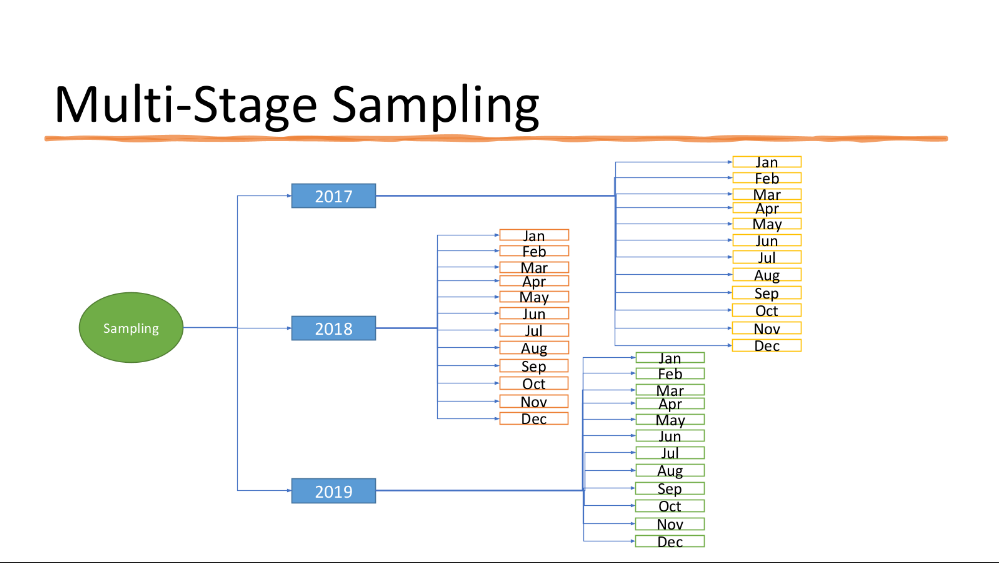

In [ ]:
n = 34849447.8
per17 = 0.3249528676893411
n17 = n*per17
sp171 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2017-01%")).sample(withReplacement=False, fraction=n17*0.08568739189299451/n , seed=212276)
sp172 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2017-02%")).sample(withReplacement=False, fraction=n17*0.0809047132446778/n , seed=212276)
sp173 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2017-03%")).sample(withReplacement=False, fraction=n17*0.09083619940892379/n, seed=212276)
sp174 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2017-04%")).sample(withReplacement=False, fraction=n17*0.0886348431903139/n, seed=212276)
sp175 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2017-05%")).sample(withReplacement=False, fraction=n17* 0.0891275921397531/n, seed=212276)
sp176 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2017-06%")).sample(withReplacement=False, fraction=n17*0.08520224597657383/n , seed=212276)
sp177 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2017-07%")).sample(withReplacement=False, fraction=n17*0.07576911610899906/n , seed=212276)
sp178 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2017-08%")).sample(withReplacement=False, fraction=n17*0.07429828685387023/n, seed=212276)
sp179 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2017-09%")).sample(withReplacement=False, fraction=n17*0.078802214116245/n ,seed=212276)
sp1710 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2017-10%")).sample(withReplacement=False, fraction=n17*0.08587449185071423/n , seed=212276)
sp1711 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2017-11%")).sample(withReplacement=False, fraction= n17*0.08148045976361896/n, seed=212276)
sp1712 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2017-12%")).sample(withReplacement=False, fraction=n17* 0.0833824454533156/n , seed=212276)

In [ ]:
per18 = 0.2906509841455795
n18 = n*per18
sp181 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2018-01%")).sample(withReplacement=False, fraction=n18*0.08584415463508077/n, seed=212276)
sp182 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2018-02%")).sample(withReplacement=False, fraction=n18*0.08322273780649578/n , seed=212276)
sp183 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2018-03%")).sample(withReplacement=False, fraction=n18*0.092331895712424/n, seed=212276)
sp184 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2018-04%")).sample(withReplacement=False, fraction=n18*0.0910820717288492/n , seed=212276)
sp185 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2018-05%")).sample(withReplacement=False, fraction=n18*0.09027384004324285/n , seed=212276)
sp186 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2018-06%")).sample(withReplacement=False, fraction=n18*0.08524580492006423/n , seed=212276)
sp187 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2018-07%")).sample(withReplacement=False, fraction=n18*0.07676472317975915/n , seed=212276)
sp188 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2018-08%")).sample(withReplacement=False, fraction=n18*0.0765455115858471/n , seed=212276)
sp189 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2018-09%")).sample(withReplacement=False, fraction=n18*0.07780484289985504/n, seed=212276)
sp1810 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2018-10%")).sample(withReplacement=False, fraction=n18*0.0845693825476591/n, seed=212276)
sp1811 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2018-11%")).sample(withReplacement=False, fraction=n18*0.07797396083372791/n , seed=212276)
sp1812 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2018-12%")).sample(withReplacement=False, fraction=n18*0.07834107410699487/n , seed=212276)

In [ ]:
per19 = 0.23574050719965783
n19 = n*per19
sp191 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2019-01%")).sample(withReplacement=False, fraction=n19*0.09085350590136738/n , seed=212276)
sp192 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2019-02%")).sample(withReplacement=False, fraction=n19*0.08321345215613578/n , seed=212276)
sp193 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2019-03%")).sample(withReplacement=False, fraction=n19*0.09294563100284568/n , seed=212276)
sp194 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2019-04%")).sample(withReplacement=False, fraction=n19*0.08824844334009926/n , seed=212276)
sp195 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2019-05%")).sample(withReplacement=False, fraction=n19*0.08979465643080126/n , seed=212276)
sp196 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2019-06%")).sample(withReplacement=False, fraction=n19*0.08240112670961149/n , seed=212276)
sp197 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2019-07%")).sample(withReplacement=False, fraction=n19*0.07465228981112544/n , seed=212276)
sp198 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2019-08%")).sample(withReplacement=False, fraction=n19*0.07195522959154951/n , seed=212276)
sp199 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2019-09%")).sample(withReplacement=False, fraction=n19*0.07783095618955388/n , seed=212276)
sp1910 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2019-10%")).sample(withReplacement=False, fraction=n19*0.08530844990214446/n, seed=212276)
sp1911 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2019-11%")).sample(withReplacement=False, fraction=n19*0.08129260239867035/n , seed=212276)
sp1912 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2019-12%")).sample(withReplacement=False, fraction=n19*0.0815036565660955/n , seed=212276)

In [ ]:
per20 = 0.06670474130152501
n20 = n*per20
sp201 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2020-01%")).sample(withReplacement=False, fraction=n20*0.26684782575964777/n , seed=212276)
sp202 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2020-02%")).sample(withReplacement=False, fraction=n20*0.2626039985659613/n , seed=212276)
sp203 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2020-03%")).sample(withReplacement=False, fraction=n20*0.12448369056252294/n , seed=212276)
sp204 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2020-04%")).sample(withReplacement=False, fraction=n20*0.00905019712010126/n , seed=212276)
sp205 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2020-05%")).sample(withReplacement=False, fraction=n20*0.011966755561352432/n , seed=212276)
sp206 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2020-06%")).sample(withReplacement=False, fraction=n20*0.020777343977523413/n, seed=212276)
sp207 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2020-07%")).sample(withReplacement=False, fraction=n20*0.03071456649709368/n, seed=212276)
sp208 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2020-08%")).sample(withReplacement=False, fraction=n20*0.03911528207106579/n, seed=212276)
sp209 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2020-09%")).sample(withReplacement=False, fraction=n20*0.0523116131412942/n , seed=212276)
sp2010 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2020-10%")).sample(withReplacement=False, fraction=n20*0.06601705893522365/n , seed=212276)
sp2011 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2020-11%")).sample(withReplacement=False, fraction=n20*0.059071847938896256/n , seed=212276)
sp2012 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2020-12%")).sample(withReplacement=False, fraction=n20*0.057039819869317325/n, seed=212276)

In [ ]:
per21 = 0.08195089966389654
n21 = n*per21
sp211 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2021-01%")).sample(withReplacement=False, fraction=n21*0.04332767635887488/n , seed=212276)
sp212 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2021-02%")).sample(withReplacement=False, fraction=n21* 0.04341391755775569/n, seed=212276)
sp213 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2021-03%")).sample(withReplacement=False, fraction=n21*0.06118296593812287/n , seed=212276)
sp214 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2021-04%")).sample(withReplacement=False, fraction=n21* 0.06969388331058078/n, seed=212276)
sp215 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2021-05%")).sample(withReplacement=False, fraction=n21*0.08118024459586667/n , seed=212276)
sp216 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2021-06%")).sample(withReplacement=False, fraction=n21*0.09210101347939784/n , seed=212276)
sp217 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2021-07%")).sample(withReplacement=False, fraction= n21*0.09138727389434441/n, seed=212276)
sp218 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2021-08%")).sample(withReplacement=False, fraction=n21*0.08983482727039847/n , seed=212276)
sp219 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2021-09%")).sample(withReplacement=False, fraction=n21*0.0956806359901505/n , seed=212276)
sp2110 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2021-10%")).sample(withReplacement=False, fraction=n21*0.1128609472540004/n , seed=212276)
sp2111 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2021-11%")).sample(withReplacement=False, fraction=n21*0.11360532469898915/n , seed=212276)
sp2112 = data17_21.filter(data17_21.tpep_pickup_datetime.like("2021-12%")).sample(withReplacement=False, fraction=n21*0.10573128965151833/n , seed=212276)

In [ ]:
sdata17 = sp171.union(sp172).union(sp173).union(sp174).union(sp175).union(sp176).union(sp177).union(sp178).union(sp179).union(sp1710).union(sp1711).union(sp1712)
sdata18 = sp181.union(sp182).union(sp183).union(sp184).union(sp185).union(sp186).union(sp187).union(sp188).union(sp189).union(sp1810).union(sp1811).union(sp1812)
sdata19 = sp191.union(sp192).union(sp193).union(sp194).union(sp195).union(sp196).union(sp197).union(sp198).union(sp199).union(sp1910).union(sp1911).union(sp1912)
sdata20 = sp201.union(sp202).union(sp203).union(sp204).union(sp205).union(sp206).union(sp207).union(sp208).union(sp209).union(sp2010).union(sp2011).union(sp2012)
sdata21 = sp211.union(sp212).union(sp213).union(sp214).union(sp215).union(sp216).union(sp217).union(sp218).union(sp219).union(sp2110).union(sp2111).union(sp2112)

In [ ]:
# sp173.count()
# sum =
# print(sum) #sum sample of years---->

In [ ]:
# sdata17.registerTempTable('dataSam2017')
# sdata18.registerTempTable('dataSam2018')
# sdata19.registerTempTable('dataSam2019')
# sdata20.registerTempTable('dataSam2020')
# sdata21.registerTempTable('dataSam2021')

In [ ]:
# df171 = sp171.toPandas()
# df172 = sp172.toPandas()
# df173 = sp173.toPandas()
# df174 = sp174.toPandas()
# df175 = sp175.toPandas()
# df176 = sp176.toPandas()
# df177 = sp177.toPandas()
# df178 = sp178.toPandas()
# df179 = sp179.toPandas()
# df1710 = sp1710.toPandas()
# df1711 = sp1711.toPandas()
# df1712 = sp1712.toPandas()

In [ ]:
# df181 = sp181.toPandas()
# df182 = sp182.toPandas()
# df183 = sp183.toPandas()
# df184 = sp184.toPandas()
# df185 = sp185.toPandas()
# df186 = sp186.toPandas()
# df187 = sp187.toPandas()
# df188 = sp188.toPandas()
# df189 = sp189.toPandas()
# df1810 = sp1810.toPandas()
# df1811 = sp1811.toPandas()
# df1812 = sp1812.toPandas()

In [ ]:
# df191 = sp191.toPandas()
# df192 = sp192.toPandas()
# df193 = sp193.toPandas()
# df194 = sp194.toPandas()
# df195 = sp195.toPandas()
# df196 = sp196.toPandas()
# df197 = sp197.toPandas()
# df198 = sp198.toPandas()
# df199 = sp199.toPandas()
# df1910 = sp1910.toPandas()
# df1911 = sp1911.toPandas()
# df1912 = sp1912.toPandas()

In [ ]:
# df201 = sp201.toPandas()
# df202 = sp202.toPandas()
# df203 = sp203.toPandas()
# df204 = sp204.toPandas()
# df205 = sp205.toPandas()
# df206 = sp206.toPandas()
# df207 = sp207.toPandas()
# df208 = sp208.toPandas()
# df209 = sp209.toPandas()
# df2010 = sp2010.toPandas()
# df2011 = sp2011.toPandas()
# df2012 = sp2012.toPandas()

In [ ]:
# df211 = sp211.toPandas()
# df212 = sp212.toPandas()
# df213 = sp213.toPandas()
# df214 = sp214.toPandas()
# df215 = sp215.toPandas()
# df216 = sp216.toPandas()
# df217 = sp217.toPandas()
# df218 = sp218.toPandas()
# df219 = sp219.toPandas()
# df2110 = sp2110.toPandas()
# df2111 = sp2111.toPandas()
# df2112 = sp2112.toPandas()

In [ ]:
df2112.sample(20)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6318          2  2021-12-07 10:11:59   2021-12-07 10:30:39              1.0   
6871          2  2021-12-07 19:04:30   2021-12-07 19:21:36              1.0   
11660         1  2021-12-12 11:05:52   2021-12-12 11:09:48              2.0   
21192         2  2021-12-23 11:02:42   2021-12-23 11:20:27              1.0   
25455         2  2021-12-31 00:32:57   2021-12-31 00:33:13              1.0   
23721         2  2021-12-28 11:28:40   2021-12-28 11:36:30              1.0   
17901         2  2021-12-18 19:04:35   2021-12-18 19:21:59              1.0   
9212          2  2021-12-09 22:19:42   2021-12-09 22:35:32              1.0   
582           2  2021-12-01 16:36:42   2021-12-01 16:46:57              1.0   
14359         2  2021-12-15 11:36:23   2021-12-15 11:41:27              1.0   
25161         2  2021-12-30 15:31:40   2021-12-30 15:42:48              1.0   
13079         2  2021-12-13 20:42:36   2021-12-13 21:12:38              2.0   
2875          2  2021-12-03 19:46:26   2021-12-03 19:53:00              2.0   
10239         2  2021-12-10 22:02:23   2021-12-10 22:06:47              1.0   
25862         2  2021-12-31 19:43:21   2021-12-31 19:46:46              1.0   
5668          1  2021-12-06 15:57:31   2021-12-06 16:30:00              1.0   
12985         2  2021-12-13 19:14:36   2021-12-13 19:27:02              1.0   
19813         1  2021-12-21 13:40:35   2021-12-21 13:41:23              1.0   
11828         2  2021-12-12 14:27:03   2021-12-12 15:01:33              1.0   
16684         1  2021-12-17 15:50:36   2021-12-17 16:14:42              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
6318            1.63         1.0                  N            68   
6871            2.76         1.0                  N           137   
11660           0.60         1.0                  N           236   
21192           2.99         1.0                  N           141   
25455           0.15         1.0                  N            27   
23721           1.40         1.0                  N            43   
17901           1.38         1.0                  N           162   
9212            3.82         1.0                  N            68   
582             2.35         1.0                  N             4   
14359           0.62         1.0                  N            79   
25161           1.95         1.0                  N           113   
13079          19.71         2.0                  N           132   
2875            1.24         1.0                  N           238   
10239           0.74         1.0                  N           148   
25862           0.47         1.0                  N           164   
5668            4.80         1.0                  N           163   
12985           2.08         1.0                  N           249   
19813           0.00         3.0                  N           168   
11828          10.88         1.0                  N           113   
16684           3.30         1.0                  N           229   

       DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
6318            230             1         12.5    0.0      0.5        3.16   
6871            262             1         13.0    1.0      0.5        2.00   
11660           237             1          5.0    2.5      0.5        2.45   
21192           239             1         13.5    0.0      0.5        2.00   
25455            27             2          2.5    0.5      0.5        0.00   
23721           143             1          7.5    0.0      0.5        2.70   
17901            50             1         11.5    0.0      0.5        3.00   
9212            239             2         14.0    0.5      0.5        0.00   
582             170             1         10.0    1.0      0.5        1.20   
14359            79             2          5.0    0.0      0.5        0.00   
25161           161             1      

In [ ]:
df2017 = [df171,df172,df173,df174,df175,df176,df177,df178,df179,df1710,df1711,df1712]
df2018 = [df181,df182,df183,df184,df185,df186,df187,df188,df189,df1810,df1811,df1812]
df2019 = [df191,df192,df193,df194,df195,df196,df197,df198,df199,df1910,df1911,df1912]
df2020 = [df201,df202,df203,df204,df205,df206,df207,df208,df209,df2010,df2011,df2012]
df2021 = [df211,df212,df213,df214,df215,df216,df217,df218,df219,df2110,df2111,df2112]

In [ ]:
samdata_17 = pd.concat(df2017)

In [ ]:
samdata_17.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2017-01-01 00:36:42   2017-01-01 00:41:09              1.0   
1         2  2017-01-01 00:27:02   2017-01-01 00:34:04              1.0   
2         1  2017-01-01 00:29:02   2017-01-01 00:39:27              2.0   
3         1  2017-01-01 00:47:05   2017-01-01 01:01:01              3.0   
4         1  2017-01-01 00:12:32   2017-01-01 00:21:14              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.10         1.0                  N            41            42   
1           0.76         1.0                  N           237           141   
2           1.20         1.0                  N           237           229   
3           2.70         1.0                  N           148           256   
4           0.90         1.0                  N            79            90   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          6.0    0.5      0.5        0.00           0.0   
1             2          6.0    0.5      0.5        0.00           0.0   
2             1          8.0    0.5      0.5        3.00           0.0   
3             2         12.5    0.5      0.5        0.00           0.0   
4             1          7.0    0.5      0.5        1.65           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    0.3          7.30                   NaN          NaN  
1                    0.3          7.30                   NaN          NaN  
2                    0.3         12.30                   NaN          NaN  
3                    0.3         13.80                   NaN          NaN  
4                    0.3          9.95                   NaN          NaN

In [ ]:
samdata_18 = pd.concat(df2018)
samdata_19 = pd.concat(df2019)
samdata_20 = pd.concat(df2020)
samdata_21 = pd.concat(df2021)

In [ ]:
samdata_17.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
255297         1  2017-12-31 23:23:34   2017-12-31 23:29:36              2.0   
255298         1  2017-12-31 23:45:21   2017-12-31 23:47:26              1.0   
255299         2  2017-12-01 00:00:06   2017-12-01 00:05:12              3.0   
255300         2  2017-12-01 00:09:45   2017-12-01 00:17:02              1.0   
255301         2  2017-12-01 00:00:46   2017-12-01 00:10:59              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
255297           1.00         1.0                  N           161   
255298           0.60         1.0                  N           193   
255299           1.39         1.0                  N            79   
255300           1.60         1.0                  N            75   
255301           1.76         1.0                  N            52   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
255297           162             2          6.0    0.5      0.5        0.00   
255298           146             2          4.0    0.5      0.5        0.00   
255299           137             1          6.5    0.5      0.5        1.17   
255300            41             1          7.5    0.5      0.5        0.00   
255301           181             1          9.0    0.5      0.5        3.09   

        tolls_amount  improvement_surcharge  total_amount  \
255297           0.0                    0.3          7.30   
255298           0.0                    0.3          5.30   
255299           0.0                    0.3          8.97   
255300           0.0                    0.3          8.80   
255301           0.0                    0.3         13.39   

        congestion_surcharge  airport_fee  
255297                   NaN          NaN  
255298                   NaN          NaN  
255299                   NaN          NaN  
255300                   NaN          NaN  
255301                   NaN          NaN

In [ ]:
# samdata_17.to_parquet('/content/gdrive/MyDrive/NYC/samdata_17.parquet.gzip',compression='gzip')

In [ ]:
# samdata_18.to_parquet('/content/gdrive/MyDrive/NYC/samdata_18.parquet.gzip',compression='gzip')
# samdata_19.to_parquet('/content/gdrive/MyDrive/NYC/samdata_19.parquet.gzip',compression='gzip')
# samdata_20.to_parquet('/content/gdrive/MyDrive/NYC/samdata_20.parquet.gzip',compression='gzip')
# samdata_21.to_parquet('/content/gdrive/MyDrive/NYC/samdata_21.parquet.gzip',compression='gzip')

# **Union Section**

In [ ]:
df17 = pd.read_parquet("/content/gdrive/MyDrive/dataForBigdata/samdata_17.parquet.gzip")
df18 = pd.read_parquet("/content/gdrive/MyDrive/dataForBigdata/samdata_18.parquet.gzip")
df19 = pd.read_parquet("/content/gdrive/MyDrive/dataForBigdata/samdata_19.parquet.gzip")
df20 = pd.read_parquet("/content/gdrive/MyDrive/dataForBigdata/samdata_20.parquet.gzip")
df21 = pd.read_parquet("/content/gdrive/MyDrive/dataForBigdata/samdata_21.parquet.gzip")


In [ ]:
df17_21 = [df17,df18,df19,df20,df21]
samdata17_21 = pd.concat(df17_21)

In [ ]:
print(df17.count(),df18.count(),df19.count(),df20.count(),df21.count())

VendorID                 3078048
tpep_pickup_datetime     3078048
tpep_dropoff_datetime    3078048
passenger_count          3078048
trip_distance            3078048
RatecodeID               3078048
store_and_fwd_flag       3078048
PULocationID             3078048
DOLocationID             3078048
payment_type             3078048
fare_amount              3078048
extra                    3078048
mta_tax                  3078048
tip_amount               3078048
tolls_amount             3078048
improvement_surcharge    3078048
total_amount             3078048
congestion_surcharge           0
airport_fee                    0
dtype: int64 VendorID                 2462031
tpep_pickup_datetime     2462031
tpep_dropoff_datetime    2462031
passenger_count          2462031
trip_distance            2462031
RatecodeID               2462031
store_and_fwd_flag       2462031
PULocationID             2462031
DOLocationID             2462031
payment_type             2462031
fare_amount              24620

In [ ]:
samdata17_21.count()

VendorID                 7639344
tpep_pickup_datetime     7639344
tpep_dropoff_datetime    7639344
passenger_count          7639344
trip_distance            7639344
RatecodeID               7639344
store_and_fwd_flag       7639344
PULocationID             7639344
DOLocationID             7639344
payment_type             7639344
fare_amount              7639344
extra                    7639344
mta_tax                  7639344
tip_amount               7639344
tolls_amount             7639344
improvement_surcharge    7639344
total_amount             7639344
congestion_surcharge     1997897
airport_fee               192712
dtype: int64

In [ ]:
# samdata17_21.to_parquet('/content/gdrive/MyDrive/dataForBigdata/samdata17_21.parquet')

In [ ]:
samdata17_21.describe().show()

# **EDA (Sample data) PANDAS VER.**

## Read data


In [ ]:
# df17 = pd.read_parquet('/content/gdrive/MyDrive/NYC/samdata_17.parquet.gzip')
df17_21 = pd.read_parquet('/content/gdrive/MyDrive/dataForBigdata/samdata17_21.parquet.gzip') #pandas ver.
# sdf17_21 = spark.read.parquet('/content/gdrive/MyDrive/dataForBigdata/samdata17_21.parquet')  #spark ver.

In [ ]:
# df17_21 = sdf17_21.toPandas()
df17_21

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             1  2017-01-01 00:36:42   2017-01-01 00:41:09              1.0   
1             2  2017-01-01 00:27:02   2017-01-01 00:34:04              1.0   
2             1  2017-01-01 00:29:02   2017-01-01 00:39:27              2.0   
3             1  2017-01-01 00:47:05   2017-01-01 01:01:01              3.0   
4             1  2017-01-01 00:12:32   2017-01-01 00:21:14              2.0   
...         ...                  ...                   ...              ...   
25984         2  2021-12-31 23:40:48   2021-12-31 23:41:23              1.0   
25985         1  2021-12-31 23:58:37   2022-01-01 00:03:00              2.0   
25986         2  2021-12-31 23:19:37   2021-12-31 23:25:28              2.0   
25987         1  2021-12-31 23:36:06   2021-12-31 23:52:29              2.0   
25988         2  2021-12-31 23:29:55   2021-12-31 23:38:52              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0               1.10         1.0                  N            41   
1               0.76         1.0                  N           237   
2               1.20         1.0                  N           237   
3               2.70         1.0                  N           148   
4               0.90         1.0                  N            79   
...              ...         ...                ...           ...   
25984           0.06         1.0                  N           186   
25985           0.70         1.0                  N           231   
25986           1.63         1.0                  N           263   
25987           3.40         1.0                  N           249   
25988           1.42         1.0                  N            41   

       DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                42             2          6.0    0.5      0.5        0.00   
1               141             2          6.0    0.5      0.5        0.00   
2               229             1          8.0    0.5      0.5        3.00   
3               256             2         12.5    0.5      0.5        0.00   
4                90             1          7.0    0.5      0.5        1.65   
...             ...           ...          ...    ...      ...         ...   
25984           186             2          2.5    0.5      0.5        0.00   
25985            87             1          5.0    3.0      0.5        1.75   
25986           162             1          7.0    0.5      0.5        2.16   
25987           229             2         13.5    3.0      0.5        0.00   
25988            42             2          8.0    0.5      0.5        0.00   

       tolls_amount  improvement_surcharge  total_amount  \
0               0.0                    0.3          7.30   
1               0.0                    0.3          7.30   
2               0.0                    0.3         12.30   
3               0.0                    0.3         13.80   
4               0.0                    0.3          9.95   
...             ...                    ...           ...   
25984           0.0                    0.3          6.30   
25985           0.0                    0.3         10.55   
25986           0.0                    0.3         12.96   
25987           0.0                    0.3         17.30   
25988           0.0                    0.3          9.30   

       congestion_surcharge  airport_fee  
0                       NaN          NaN  
1                       NaN          NaN  
2                       NaN          NaN  
3                       NaN          NaN  
4                       NaN          NaN  
...                     ...          ...  
25984                   2.5          0.0  
25985                   2.5          0.0  
25986                   2.5          0.0  
25987                   2.5          0.0  
25988                   0.0          0.0  

[7639344 rows x 19 columns]

In [ ]:
# sdf17_21.show()

In [ ]:
# sdf17_21.show()
# df17_21.toPandas()

*Most taxi rides have 1 passenger.***

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(df17_21.passenger_count, ax=ax[0])
ax[0].set_xlabel('Passenger Count')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of Passenger Count')
sns.barplot(df17_21.passenger_count, df17_21.fare_amount, ax=ax[1], ci=None)
ax[1].set_xlabel('Passenger Count')
ax[1].set_ylabel('Fare ($)')
ax[1].set_title('Average Fare by Passenger Count')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


***Average fare saw a large increase between 2017 and 2021***

In [ ]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=df17_21,x='trip_distance', y='fare_amount')
plt.xlabel('Distance (m)')
plt.ylabel('Fare ($)')

Text(0, 0.5, 'Fare ($)')

## *Drop out liner*

In [ ]:
filter1 = df17_21["fare_amount"] < 1000

In [ ]:
df17_21f = df17_21

In [ ]:
df17_21f.where(filter1,inplace=True)

In [ ]:
df17_21f['elapsed_time'] = df17_21f['tpep_dropoff_datetime'] - df17_21f['tpep_pickup_datetime']

In [ ]:
df17_21f['avg_speed'] = df17_21f['trip_distance'] / (df17_21f['elapsed_time'].dt.total_seconds()/60 )

In [ ]:
df17_21f['elapsed_time'].dt.total_seconds()

0        267.0
1        422.0
2        625.0
3        836.0
4        522.0
         ...  
25984     35.0
25985    263.0
25986    351.0
25987    983.0
25988    537.0
Name: elapsed_time, Length: 7639344, dtype: float64

In [ ]:
df17_21f.dtypes

VendorID                         float64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                  float64
trip_distance                    float64
RatecodeID                       float64
store_and_fwd_flag                object
PULocationID                     float64
DOLocationID                     float64
payment_type                     float64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
airport_fee                      float64
elapsed_time             timedelta64[ns]
avg_speed                        float64
dtype: object

In [ ]:
df17_21f

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0           1.0  2017-01-01 00:36:42   2017-01-01 00:41:09              1.0   
1           2.0  2017-01-01 00:27:02   2017-01-01 00:34:04              1.0   
2           1.0  2017-01-01 00:29:02   2017-01-01 00:39:27              2.0   
3           1.0  2017-01-01 00:47:05   2017-01-01 01:01:01              3.0   
4           1.0  2017-01-01 00:12:32   2017-01-01 00:21:14              2.0   
...         ...                  ...                   ...              ...   
25984       2.0  2021-12-31 23:40:48   2021-12-31 23:41:23              1.0   
25985       1.0  2021-12-31 23:58:37   2022-01-01 00:03:00              2.0   
25986       2.0  2021-12-31 23:19:37   2021-12-31 23:25:28              2.0   
25987       1.0  2021-12-31 23:36:06   2021-12-31 23:52:29              2.0   
25988       2.0  2021-12-31 23:29:55   2021-12-31 23:38:52              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0               1.10         1.0                  N          41.0   
1               0.76         1.0                  N         237.0   
2               1.20         1.0                  N         237.0   
3               2.70         1.0                  N         148.0   
4               0.90         1.0                  N          79.0   
...              ...         ...                ...           ...   
25984           0.06         1.0                  N         186.0   
25985           0.70         1.0                  N         231.0   
25986           1.63         1.0                  N         263.0   
25987           3.40         1.0                  N         249.0   
25988           1.42         1.0                  N          41.0   

       DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
0              42.0           2.0  ...    0.5      0.5        0.00   
1             141.0           2.0  ...    0.5      0.5        0.00   
2             229.0           1.0  ...    0.5      0.5        3.00   
3             256.0           2.0  ...    0.5      0.5        0.00   
4              90.0           1.0  ...    0.5      0.5        1.65   
...             ...           ...  ...    ...      ...         ...   
25984         186.0           2.0  ...    0.5      0.5        0.00   
25985          87.0           1.0  ...    3.0      0.5        1.75   
25986         162.0           1.0  ...    0.5      0.5        2.16   
25987         229.0           2.0  ...    3.0      0.5        0.00   
25988          42.0           2.0  ...    0.5      0.5        0.00   

       tolls_amount  improvement_surcharge  total_amount  \
0               0.0                    0.3          7.30   
1               0.0                    0.3          7.30   
2               0.0                    0.3         12.30   
3               0.0                    0.3         13.80   
4               0.0                    0.3          9.95   
...             ...                    ...           ...   
25984           0.0                    0.3          6.30   
25985           0.0                    0.3         10.55   
25986           0.0                    0.3         12.96   
25987           0.0                    0.3         17.30   
25988           0.0                    0.3          9.30   

       congestion_surcharge  airport_fee    elapsed_time avg_speed  
0                       NaN          NaN 0 days 00:04:27  0.247191  
1                       NaN          NaN 0 days 00:07:02  0.108057  
2                       NaN          NaN 0 days 00:10:25  0.115200  
3                       NaN          NaN 0 days 00:13:56  0.193780  
4                       NaN          NaN 0 days 00:08:42  0.103448  
...                     ...          ...             ...       ...  
25984                   2.5          0.0 0 days 00:00:35  0.102857  
25985                   2.5          0.0 0 days 00:04:23  0.159696  
25986                   2.5          0.0 0 day

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(df17_21f.passenger_count, ax=ax[0])
ax[0].set_xlabel('Passenger Count')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of Passenger Count')
sns.barplot(df17_21f.passenger_count, df17_21f.fare_amount, ax=ax[1], ci=None)
ax[1].set_xlabel('Passenger Count')
ax[1].set_ylabel('Fare ($)')
ax[1].set_title('Average Fare by Passenger Count')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Fare ($)')

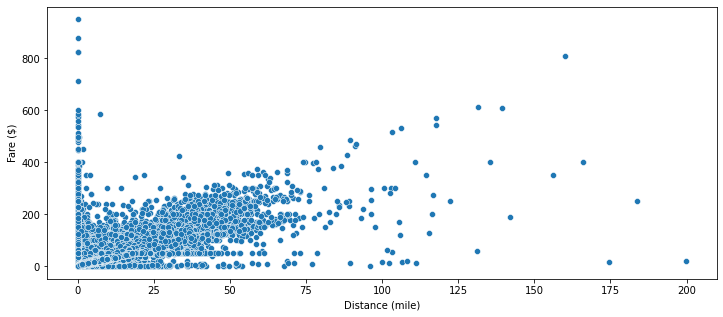

In [ ]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(data=df17_21f,x='trip_distance', y='fare_amount')
plt.xlabel('Distance (mile)')
plt.ylabel('Fare ($)')

## Correlation

In [ ]:
#Find Corr
corr = df17_21f.corr().round(2)
corr

VendorID  passenger_count  trip_distance  RatecodeID  \
VendorID                   1.00             0.23           0.03        0.02   
passenger_count            0.23             1.00           0.01       -0.00   
trip_distance              0.03             0.01           1.00        0.39   
RatecodeID                 0.02            -0.00           0.39        1.00   
PULocationID              -0.02            -0.01          -0.09       -0.02   
DOLocationID              -0.01            -0.01          -0.09       -0.01   
payment_type              -0.03             0.01          -0.04       -0.02   
fare_amount                0.02             0.01           0.90        0.54   
extra                     -0.29            -0.06           0.04        0.01   
mta_tax                    0.01             0.01          -0.14       -0.62   
tip_amount                 0.02            -0.00           0.54        0.31   
tolls_amount               0.01             0.01           0.52        0.33   
improvement_surcharge     -0.00             0.00           0.00       -0.08   
total_amount               0.03             0.01           0.89        0.54   
congestion_surcharge       0.00             0.01          -0.19       -0.19   
airport_fee                0.01             0.01           0.61        0.23   
avg_speed                 -0.01            -0.00           0.06        0.04   

                       PULocationID  DOLocationID  payment_type  fare_amount  \
VendorID                      -0.02         -0.01         -0.03         0.02   
passenger_count               -0.01         -0.01          0.01         0.01   
trip_distance                 -0.09         -0.09         -0.04         0.90   
RatecodeID                    -0.02         -0.01         -0.02         0.54   
PULocationID                   1.00          0.11         -0.02        -0.08   
DOLocationID                   0.11          1.00         -0.02        -0.08   
payment_type                  -0.02         -0.02          1.00        -0.05   
fare_amount                   -0.08         -0.08         -0.05         1.00   
extra                          0.00          0.00         -0.03         0.02   
mta_tax                       -0.00          0.04          0.00        -0.29   
tip_amount                    -0.03         -0.04         -0.48         0.57   
tolls_amount                  -0.04         -0.04         -0.03         0.51   
improvement_surcharge         -0.00         -0.01         -0.01        -0.03   
total_amount                  -0.07         -0.08         -0.14         0.98   
congestion_surcharge           0.10          0.10         -0.09        -0.21   
airport_fee                   -0.11         -0.05          0.03         0.54   
avg_speed                     -0.00         -0.00          0.02         0.03   

                       extra  mta_tax  tip_amount  tolls_amount  \
VendorID               -0.29     0.01        0.02          0.01   
passenger_count        -0.06     0.01       -0.00          0.01   
trip_distance           0.04    -0.14        0.54          0.52   
RatecodeID              0.01    -0.62        0.31          0.33   
PULocationID            0.00    -0.00       -0.03         -0.04   
DOLocationID            0.00     0.04       -0.04         -0.04   
payment_type           -0.03     0.00       -0.48         -0.03   
fare_amount             0.02    -0.29        0.57          0.51   
extra                   1.00     0.03        0.06          0.02   
mta_tax                 0.03     1.00       -0.16         -0.26   
tip_amount              0.06    -0.16        1.00          0.37   
tolls_amount            0.02    -0.26        0.37          1.00   
improvement_surcharge   0.00     0.09       -0.01         -0.00   
total_amount            0.08    -0.29        0.70          0.60   
congestion_surcharge    0.21     0.18       -0.02         -0.09   
airport_fee             0.02    -0.02        0.34          0.44   
avg_speed           

In [ ]:
plt.figure(figsize = (12,7))
sns.heatmap(corr,cmap="Blues", annot=True)

In [ ]:
# sns.boxplot(x=train['close_to_airport'], y=train['fare_amount'])
# plt.title('Fare Distribution by Proximity to Airports')
# plt.ylim(-1,200)
# plt.xlabel('Close to Airport')
# plt.ylabel('Fare ($)')

In [ ]:
# !pip install fastparquet
# df17_21f.to_parquet('/content/gdrive/MyDrive/dataForBigdata/df17_21f_EDA.parquet.gzip',engine='fastparquet',compression='gzip') #

In [ ]:
# df = pd.read_csv('/content/gdrive/MyDrive/dataForBigdata/df17_21f_EDA.csv')
# df.dtypes

## Calendar funtion
  

1.   0 is Monday
2.   6 is Sunday



*Fares are highest around 5am, primarily due to long trips leaving the city.*

In [ ]:
# # https://www.geeksforgeeks.org/calendar-functions-in-python-set-2monthrange-prcal-weekday/?ref=lbp
# import calendar as cld

# # yy = 2017
# # mm = 11
# # print(calendar.month(yy, mm))
# obj = calendar.Calendar(firstweekday = 0)
# for day in obj.iterweekdays():
#     print(day)

In [ ]:
df17_21f.dtypes

VendorID                         float64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                  float64
trip_distance                    float64
RatecodeID                       float64
store_and_fwd_flag                object
PULocationID                     float64
DOLocationID                     float64
payment_type                     float64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
airport_fee                      float64
elapsed_time             timedelta64[ns]
avg_speed                        float64
dtype: object

In [ ]:
# from datetime import datetime
# dt = datetime.now().date()

In [ ]:
df17_21f['Weekday_pu'] = df17_21f['tpep_pickup_datetime'].dt.dayofweek


In [ ]:
df17_21f.dtypes

VendorID                         float64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                  float64
trip_distance                    float64
RatecodeID                       float64
store_and_fwd_flag                object
PULocationID                     float64
DOLocationID                     float64
payment_type                     float64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
airport_fee                      float64
elapsed_time             timedelta64[ns]
avg_speed                        float64
Weekday_pu                       float64
dtype: object

## Fare_amount Group by Time

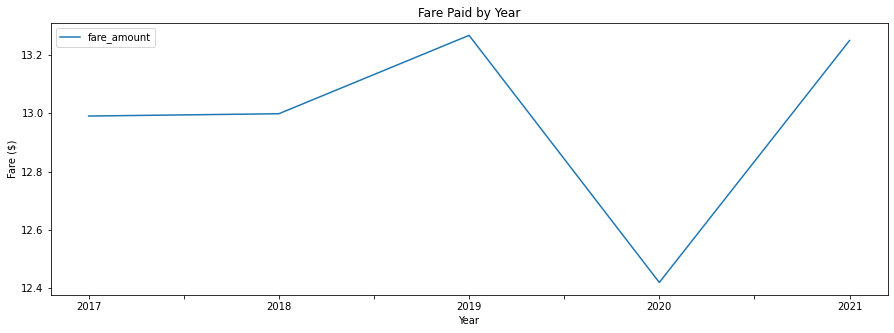

In [ ]:
df17_21f.pivot_table('fare_amount', index=df17_21f['tpep_pickup_datetime'].dt.strftime('%Y')).plot(figsize=(15,5))
plt.title('Fare Paid by Year')
plt.ylabel('Fare ($)')
plt.xlabel('Year')
plt.show()

In [ ]:
df17_21f.pivot_table('fare_amount', index=df17_21f['tpep_pickup_datetime'].dt.strftime('%m')).plot(figsize=(15,5))
plt.title('Fare Paid by Month')
plt.ylabel('Fare ($)')
plt.xlabel('Month')
plt.show()

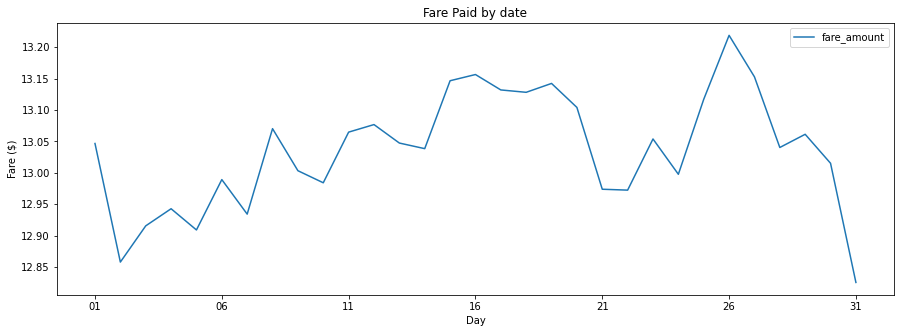

In [ ]:
df17_21f.pivot_table('fare_amount', index=df17_21f['tpep_pickup_datetime'].dt.strftime('%d')).plot(figsize=(15,5))
plt.title('Fare Paid by date')
plt.ylabel('Fare ($)')
plt.xlabel('Day')
plt.show()

In [ ]:
df17_21f.pivot_table('fare_amount', index=df17_21f['Weekday_pu']).plot(figsize=(15,5))
plt.title('Fare Paid by Weekday (Monday-Sunday)')
plt.ylabel('Fare ($)')
plt.xlabel('Day (0 = mon ,6 = sun )')
plt.show()

In [ ]:
df17_21f.pivot_table('fare_amount', index=df17_21f['tpep_pickup_datetime'].dt.strftime('%H')).plot(figsize=(15,5))
plt.ylabel('Fare ($)')
plt.xlabel('Time')
plt.title('Fare Paid by Time of Day')
plt.show()

## Rush hours

In [ ]:
df17_21f['Hours'] = df17_21f['tpep_pickup_datetime'].dt.strftime('%H')
df17_21f['Month'] = df17_21f['tpep_pickup_datetime'].dt.strftime('%m')
df17_21f['Yeah'] = df17_21f['tpep_pickup_datetime'].dt.strftime('%Y')

In [ ]:
df17_21f

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0           1.0  2017-01-01 00:36:42   2017-01-01 00:41:09              1.0   
1           2.0  2017-01-01 00:27:02   2017-01-01 00:34:04              1.0   
2           1.0  2017-01-01 00:29:02   2017-01-01 00:39:27              2.0   
3           1.0  2017-01-01 00:47:05   2017-01-01 01:01:01              3.0   
4           1.0  2017-01-01 00:12:32   2017-01-01 00:21:14              2.0   
...         ...                  ...                   ...              ...   
25984       2.0  2021-12-31 23:40:48   2021-12-31 23:41:23              1.0   
25985       1.0  2021-12-31 23:58:37   2022-01-01 00:03:00              2.0   
25986       2.0  2021-12-31 23:19:37   2021-12-31 23:25:28              2.0   
25987       1.0  2021-12-31 23:36:06   2021-12-31 23:52:29              2.0   
25988       2.0  2021-12-31 23:29:55   2021-12-31 23:38:52              1.0   

       trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0               1.10         1.0                  N          41.0   
1               0.76         1.0                  N         237.0   
2               1.20         1.0                  N         237.0   
3               2.70         1.0                  N         148.0   
4               0.90         1.0                  N          79.0   
...              ...         ...                ...           ...   
25984           0.06         1.0                  N         186.0   
25985           0.70         1.0                  N         231.0   
25986           1.63         1.0                  N         263.0   
25987           3.40         1.0                  N         249.0   
25988           1.42         1.0                  N          41.0   

       DOLocationID  payment_type  ...  improvement_surcharge  total_amount  \
0              42.0           2.0  ...                    0.3          7.30   
1             141.0           2.0  ...                    0.3          7.30   
2             229.0           1.0  ...                    0.3         12.30   
3             256.0           2.0  ...                    0.3         13.80   
4              90.0           1.0  ...                    0.3          9.95   
...             ...           ...  ...                    ...           ...   
25984         186.0           2.0  ...                    0.3          6.30   
25985          87.0           1.0  ...                    0.3         10.55   
25986         162.0           1.0  ...                    0.3         12.96   
25987         229.0           2.0  ...                    0.3         17.30   
25988          42.0           2.0  ...                    0.3          9.30   

       congestion_surcharge  airport_fee    elapsed_time  avg_speed  \
0                       NaN          NaN 0 days 00:04:27   0.247191   
1                       NaN          NaN 0 days 00:07:02   0.108057   
2                       NaN          NaN 0 days 00:10:25   0.115200   
3                       NaN          NaN 0 days 00:13:56   0.193780   
4                       NaN          NaN 0 days 00:08:42   0.103448   
...                     ...          ...             ...        ...   
25984                   2.5          0.0 0 days 00:00:35   0.102857   
25985                   2.5          0.0 0 days 00:04:23   0.159696   
25986                   2.5          0.0 0 days 00:05:51   0.278632   
25987                   2.5          0.0 0 days 00:16:23   0.207528   
25988                   0.0          0.0 0 days 00:08:57   0.158659   

       Weekday_pu  Hours  Month  Yeah  
0             6.0     00     01  2017  
1             6.0     00     01  2017  
2             6.0     00     01  2017  
3             6.0     00     01  2017  
4             6.0     00     01  2017  
...           ...    ...    ...   ...  
25984         4.0     23     12  2021  
25985         4.0     23     12  2021  
25986         4.0     23     12  2021  
25987         4.0     23   

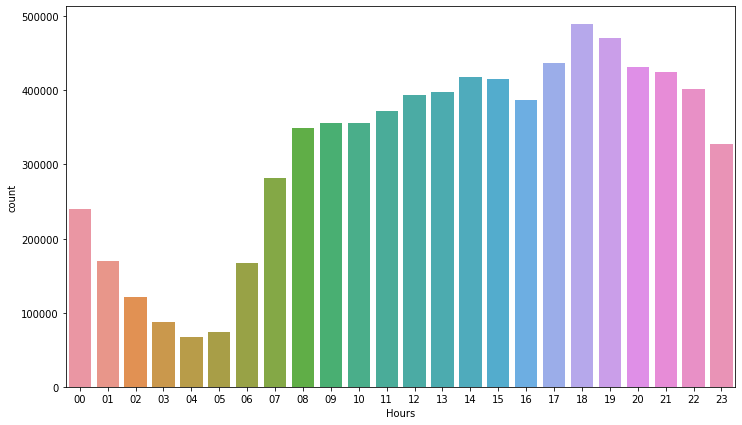

In [ ]:
plt.figure(figsize = (12,7))
sns.countplot(data=df17_21f ,x = 'Hours')

In [ ]:
plt.figure(figsize = (12,7))
sns.countplot(data=df17_21f ,x = 'Weekday_pu')

In [ ]:
plt.figure(figsize = (12,7))
sns.countplot(data=df17_21f ,x = 'Month')

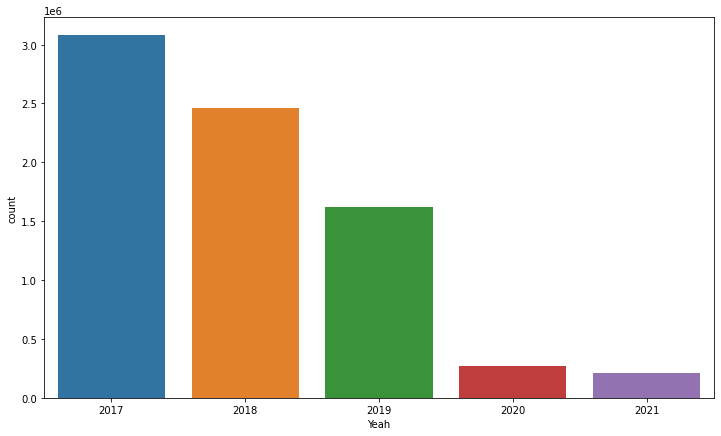

In [ ]:
plt.figure(figsize = (12,7))
sns.countplot(data=df17_21f ,x = 'Yeah')

In [ ]:
# df17_21f.to_csv('/content/gdrive/MyDrive/dataForBigdata/df17_21f_EDA2.csv') #
# !pip install fastparquet
# df17_21f.to_parquet('/content/gdrive/MyDrive/dataForBigdata/df17_21f_EDA2.parquet.gzip',engine='fastparquet',compression='gzip') #

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.5 MB 29.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.0 MB 66.8 MB/s 


# Machine Learning on Spark ‚ú®

## Prepare data for ML

In [ ]:
path = '/content/gdrive/MyDrive/dataForBigdata/df17_21f_EDA2.csv'
df17_21 = spark.read.option("delimiter", ",").option("header", True).csv(path)

In [ ]:
df17_21 = df17_21.drop(col('_c0'))

In [ ]:
df17_21.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+---------------+-------------------+----------+-----+-----+----+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|   elapsed_time|          avg_speed|Weekday_pu|Hours|Month|Yeah|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+---------------+-------------------+----------+-----+-----+-

In [ ]:
df17_21.dtypes

[('VendorID', 'string'),
 ('tpep_pickup_datetime', 'string'),
 ('tpep_dropoff_datetime', 'string'),
 ('passenger_count', 'string'),
 ('trip_distance', 'string'),
 ('RatecodeID', 'string'),
 ('store_and_fwd_flag', 'string'),
 ('PULocationID', 'string'),
 ('DOLocationID', 'string'),
 ('payment_type', 'string'),
 ('fare_amount', 'string'),
 ('extra', 'string'),
 ('mta_tax', 'string'),
 ('tip_amount', 'string'),
 ('tolls_amount', 'string'),
 ('improvement_surcharge', 'string'),
 ('total_amount', 'string'),
 ('congestion_surcharge', 'string'),
 ('airport_fee', 'string'),
 ('elapsed_time', 'string'),
 ('avg_speed', 'string'),
 ('Weekday_pu', 'string'),
 ('Hours', 'string'),
 ('Month', 'string'),
 ('Yeah', 'string')]

In [ ]:
sdf17_21 = df17_21

In [ ]:
sdf17_21.dtypes

[('VendorID', 'string'),
 ('tpep_pickup_datetime', 'string'),
 ('tpep_dropoff_datetime', 'string'),
 ('passenger_count', 'string'),
 ('trip_distance', 'string'),
 ('RatecodeID', 'string'),
 ('store_and_fwd_flag', 'string'),
 ('PULocationID', 'string'),
 ('DOLocationID', 'string'),
 ('payment_type', 'string'),
 ('fare_amount', 'string'),
 ('extra', 'string'),
 ('mta_tax', 'string'),
 ('tip_amount', 'string'),
 ('tolls_amount', 'string'),
 ('improvement_surcharge', 'string'),
 ('total_amount', 'string'),
 ('congestion_surcharge', 'string'),
 ('airport_fee', 'string'),
 ('elapsed_time', 'string'),
 ('avg_speed', 'string'),
 ('Weekday_pu', 'string'),
 ('Hours', 'string'),
 ('Month', 'string'),
 ('Yeah', 'string')]

In [ ]:
cols = ['RatecodeID','passenger_count','trip_distance','PULocationID','DOLocationID','fare_amount','extra','mta_tax','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','airport_fee','avg_speed','Hours','Month','Yeah','tip_amount']
for col_name in cols:
    sdf17_21 = sdf17_21.withColumn(col_name, col(col_name).cast('double'))
    print(col_name)

RatecodeID
passenger_count
trip_distance
PULocationID
DOLocationID
fare_amount
extra
mta_tax
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge
airport_fee
avg_speed
Hours
Month
Yeah
tip_amount


In [ ]:
cols2 = ['tpep_pickup_datetime','tpep_dropoff_datetime','elapsed_time']
for col_name in cols2:
    sdf17_21 = sdf17_21.withColumn(col_name, col(col_name).cast('timestamp'))
    print(col_name)

tpep_pickup_datetime
tpep_dropoff_datetime
elapsed_time


In [ ]:
# cols3 = ['Hours','Month','Yeah']
# for col_name in cols3:
#     sdf17_21 = sdf17_21.withColumn(col_name, col(col_name).cast('int'))
#     print(col_name)

In [ ]:
sdf17_21.dtypes

[('VendorID', 'string'),
 ('tpep_pickup_datetime', 'timestamp'),
 ('tpep_dropoff_datetime', 'timestamp'),
 ('passenger_count', 'double'),
 ('trip_distance', 'double'),
 ('RatecodeID', 'double'),
 ('store_and_fwd_flag', 'string'),
 ('PULocationID', 'double'),
 ('DOLocationID', 'double'),
 ('payment_type', 'string'),
 ('fare_amount', 'double'),
 ('extra', 'double'),
 ('mta_tax', 'double'),
 ('tip_amount', 'double'),
 ('tolls_amount', 'double'),
 ('improvement_surcharge', 'double'),
 ('total_amount', 'double'),
 ('congestion_surcharge', 'double'),
 ('airport_fee', 'double'),
 ('elapsed_time', 'timestamp'),
 ('avg_speed', 'double'),
 ('Weekday_pu', 'string'),
 ('Hours', 'double'),
 ('Month', 'double'),
 ('Yeah', 'double')]

In [ ]:
# sdf17_21.sort(sdf17_21.fare_amount.desc()).show()

In [ ]:
sdf17_21 = sdf17_21.filter((sdf17_21.tpep_pickup_datetime.like("2017%")) | (sdf17_21.tpep_pickup_datetime.like("2018%")) | (sdf17_21.tpep_pickup_datetime.like("2019%")))

In [ ]:
# sdf17_21.describe().show()

## Regression üç≠ fare_amount

In [ ]:
cols = ['passenger_count','RatecodeID','trip_distance','Hours','Month','tip_amount','tolls_amount','total_amount']
for col_name in cols:
    sdf17_21 = sdf17_21.filter(col(col_name).isNotNull())
    print(col_name)

passenger_count
RatecodeID
trip_distance
Hours
Month
tip_amount
tolls_amount
total_amount


In [ ]:
sdf17_21 = sdf17_21.na.fill(value=0,subset=["airport_fee"])

In [ ]:
sdf17_21.select(col('airport_fee')).show()

+-----------+
|airport_fee|
+-----------+
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
|        0.0|
+-----------+
only showing top 20 rows



In [ ]:
spark = SparkSession.builder.appName("lin_reg").getOrCreate()

In [ ]:
sdf17_21.printSchema()

root
 |-- VendorID: string (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: double (nullable = true)
 |-- DOLocationID: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = false)
 |-- elapsed_time: timestamp (nullable = true)
 |-- avg_speed: double (nullable = true)
 |-- Weekday_pu: string (nullable = true)


In [ ]:
sdf17_21.head()

Row(VendorID='1.0', tpep_pickup_datetime=datetime.datetime(2017, 1, 1, 0, 36, 42), tpep_dropoff_datetime=datetime.datetime(2017, 1, 1, 0, 41, 9), passenger_count=1.0, trip_distance=1.1, RatecodeID=1.0, store_and_fwd_flag='N', PULocationID=41.0, DOLocationID=42.0, payment_type='2.0', fare_amount=6.0, extra=0.5, mta_tax=0.5, tip_amount=0.0, tolls_amount=0.0, improvement_surcharge=0.3, total_amount=7.3, congestion_surcharge=None, airport_fee=0.0, elapsed_time=None, avg_speed=0.24719101123595508, Weekday_pu='6.0', Hours=0.0, Month=1.0, Yeah=2017.0)

### Setup

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
sdf17_21.columns

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'elapsed_time',
 'avg_speed',
 'Weekday_pu',
 'Hours',
 'Month',
 'Yeah']

In [ ]:
coef_var = ['passenger_count','RatecodeID','trip_distance','Hours','Month','tip_amount','tolls_amount','total_amount','airport_fee']#
assembler = VectorAssembler(inputCols= coef_var,
                            outputCol='features')

In [ ]:
output = assembler.transform(sdf17_21)

In [ ]:
# output.show()

In [ ]:
final_df = output.select('features','fare_amount')

In [ ]:
final_df.show()

+--------------------+-----------+
|            features|fare_amount|
+--------------------+-----------+
|[1.0,1.0,1.1,0.0,...|        6.0|
|[1.0,1.0,0.76,0.0...|        6.0|
|[2.0,1.0,1.2,0.0,...|        8.0|
|[3.0,1.0,2.7,0.0,...|       12.5|
|[2.0,1.0,0.9,0.0,...|        7.0|
|[4.0,1.0,4.1,0.0,...|       15.5|
|[1.0,1.0,0.9,0.0,...|        8.0|
|[1.0,1.0,3.0,0.0,...|       13.0|
|[1.0,1.0,2.0,0.0,...|        8.5|
|[1.0,1.0,1.9,0.0,...|       10.5|
|[2.0,1.0,5.04,0.0...|       21.5|
|[2.0,1.0,6.5,0.0,...|       23.0|
|[1.0,1.0,2.6,0.0,...|       10.5|
|[1.0,1.0,1.42,0.0...|        9.5|
|[1.0,1.0,1.13,0.0...|        7.5|
|[3.0,1.0,2.63,0.0...|       13.0|
|[1.0,1.0,1.7,0.0,...|       11.0|
|[1.0,1.0,5.5,0.0,...|       21.0|
|[4.0,1.0,5.1,0.0,...|       17.5|
|[1.0,1.0,1.2,0.0,...|        6.5|
+--------------------+-----------+
only showing top 20 rows



In [ ]:
train_data, test_data = final_df.randomSplit([0.7 , 0.3])

In [ ]:
train_data.describe().show()

+-------+------------------+
|summary|       fare_amount|
+-------+------------------+
|  count|           5015336|
|   mean|13.059350799228511|
| stddev|11.612112457287475|
|    min|              0.01|
|    max|             950.0|
+-------+------------------+



In [ ]:
test_data.describe().show()

+-------+------------------+
|summary|       fare_amount|
+-------+------------------+
|  count|           2148194|
|   mean|13.048143556866775|
| stddev|11.632746989723298|
|    min|              0.01|
|    max|             825.0|
+-------+------------------+



### ML

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
lm = LinearRegression(labelCol='fare_amount')

In [ ]:
model = lm.fit(train_data)

In [ ]:
pd.DataFrame({"Coefficients": model.coefficients},index=coef_var)

Coefficients
passenger_count      0.003207
RatecodeID           0.499055
trip_distance        0.111765
Hours               -0.022947
Month               -0.017342
tip_amount          -0.970484
tolls_amount        -0.948033
total_amount         0.953487
airport_fee          0.000000

In [ ]:
res = model.evaluate(test_data)

In [ ]:
res.residuals.show()

+--------------------+
|           residuals|
+--------------------+
| -0.2878785334944354|
| -0.2878785334944354|
| -0.2878785334944354|
|-0.26462179386139617|
|-0.14833809569620193|
|0.015508973898022749|
| -0.2705369823221533|
| -0.2705369823221533|
| -0.2705369823221533|
| -0.2705369823221533|
| -0.2705369823221533|
| -0.2705369823221533|
| -0.2705369823221533|
|-0.24728024268911497|
|-0.20076676342303656|
| -0.0379695859917657|
| 0.12482759143950517|
| -0.2531954311498721|
| -0.2531954311498721|
| -0.2531954311498721|
+--------------------+
only showing top 20 rows



In [ ]:
unlabeled_data = test_data.select('features')

In [ ]:
predictions = model.transform(unlabeled_data)

In [ ]:
predictions.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|(9,[0,1,4,7],[1.0...|2.7878785334944354|
|(9,[0,1,4,7],[1.0...|2.7878785334944354|
|(9,[0,1,4,7],[1.0...|2.7878785334944354|
|(9,[0,1,4,7],[1.0...| 3.264621793861396|
|(9,[0,1,4,7],[1.0...| 5.648338095696202|
|(9,[0,1,4,7],[1.0...|2.4844910261019773|
|(9,[0,1,4,7],[1.0...|2.7705369823221533|
|(9,[0,1,4,7],[1.0...|2.7705369823221533|
|(9,[0,1,4,7],[1.0...|2.7705369823221533|
|(9,[0,1,4,7],[1.0...|2.7705369823221533|
|(9,[0,1,4,7],[1.0...|2.7705369823221533|
|(9,[0,1,4,7],[1.0...|2.7705369823221533|
|(9,[0,1,4,7],[1.0...|2.7705369823221533|
|(9,[0,1,4,7],[1.0...| 3.247280242689115|
|(9,[0,1,4,7],[1.0...| 4.200766763423037|
|(9,[0,1,4,7],[1.0...| 7.537969585991766|
|(9,[0,1,4,7],[1.0...|10.875172408560495|
|(9,[0,1,4,7],[1.0...| 2.753195431149872|
|(9,[0,1,4,7],[1.0...| 2.753195431149872|
|(9,[0,1,4,7],[1.0...| 2.753195431149872|
+--------------------+------------

In [ ]:
print("Predict(Y) : fare_amount")
print(f"MAE: {res.meanAbsoluteError}")
print(f"MSE: {res.meanSquaredError}")
print(f"RMSE: {res.rootMeanSquaredError}")
print(f"R2: {res.r2}")
print(f"Adj R2: {res.r2adj}")

Predict(Y) : fare_amount
MAE: 0.7933769201894358
MSE: 1.0968690538178414
RMSE: 1.0473151645124983
R2: 0.9918943019555293
Adj R2: 0.9918942679960163


1:
MAE: 2.230004433045777
MSE: 20.989179641742247
RMSE: 4.58139494496406
R2: 0.8455625894751577
Adj R2: 0.8455622524558547

2:
MAE: 0.8914492005031478
MSE: 1.2601265040252134
RMSE: 1.1225535639893596
R2: 0.9907080553534461
Adj R2: 0.990708022916966

3:No RateCodeID
MAE: 0.8964084029203027
MSE: 1.2790538334690567
RMSE: 1.130952622115116
R2: 0.9904837479377111
Adj R2: 0.9904837188512078

### **Plot Graph**

In [ ]:
predictions.show() ,
train_data.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|(9,[0,1,4,7],[1.0...|2.7878785334944354|
|(9,[0,1,4,7],[1.0...|2.7878785334944354|
|(9,[0,1,4,7],[1.0...|2.7878785334944354|
|(9,[0,1,4,7],[1.0...| 3.264621793861396|
|(9,[0,1,4,7],[1.0...| 5.648338095696202|
|(9,[0,1,4,7],[1.0...|2.4844910261019773|
|(9,[0,1,4,7],[1.0...|2.7705369823221533|
|(9,[0,1,4,7],[1.0...|2.7705369823221533|
|(9,[0,1,4,7],[1.0...|2.7705369823221533|
|(9,[0,1,4,7],[1.0...|2.7705369823221533|
|(9,[0,1,4,7],[1.0...|2.7705369823221533|
|(9,[0,1,4,7],[1.0...|2.7705369823221533|
|(9,[0,1,4,7],[1.0...|2.7705369823221533|
|(9,[0,1,4,7],[1.0...| 3.247280242689115|
|(9,[0,1,4,7],[1.0...| 4.200766763423037|
|(9,[0,1,4,7],[1.0...| 7.537969585991766|
|(9,[0,1,4,7],[1.0...|10.875172408560495|
|(9,[0,1,4,7],[1.0...| 2.753195431149872|
|(9,[0,1,4,7],[1.0...| 2.753195431149872|
|(9,[0,1,4,7],[1.0...| 2.753195431149872|
+--------------------+------------

In [ ]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import ArrayType, DoubleType

def to_array(col):
    def to_array_(v):
        return v.toArray().tolist()
    # Important: asNondeterministic requires Spark 2.3 or later
    # It can be safely removed i.e.
    # return udf(to_array_, ArrayType(DoubleType()))(col)
    # but at the cost of decreased performance
    return udf(to_array_, ArrayType(DoubleType())).asNondeterministic()(col)

predictions=(predictions
    .withColumn("features", to_array(col("features")))
    .select(col("prediction")))

predictions.show()

+------------------+
|        prediction|
+------------------+
|2.7878785334944354|
|2.7878785334944354|
|2.7878785334944354|
| 3.264621793861396|
| 5.648338095696202|
|2.4844910261019773|
|2.7705369823221533|
|2.7705369823221533|
|2.7705369823221533|
|2.7705369823221533|
|2.7705369823221533|
|2.7705369823221533|
|2.7705369823221533|
| 3.247280242689115|
| 4.200766763423037|
| 7.537969585991766|
|10.875172408560495|
| 2.753195431149872|
| 2.753195431149872|
| 2.753195431149872|
+------------------+
only showing top 20 rows



In [ ]:
test =(test_data
    .withColumn("features", to_array(col("features")))
    .select(col("fare_amount")))
test.show()

+-----------+
|fare_amount|
+-----------+
|        2.5|
|        2.5|
|        2.5|
|        3.0|
|        5.5|
|        2.5|
|        2.5|
|        2.5|
|        2.5|
|        2.5|
|        2.5|
|        2.5|
|        2.5|
|        3.0|
|        4.0|
|        7.5|
|       11.0|
|        2.5|
|        2.5|
|        2.5|
+-----------+
only showing top 20 rows



In [ ]:
dfpred = predictions.toPandas()
dftest = test.toPandas()

In [ ]:
dfpred

prediction
0          2.787879
1          2.787879
2          2.787879
3          3.264622
4          5.648338
...             ...
2148189   63.288545
2148190   59.051919
2148191   64.822115
2148192   73.005936
2148193   86.510180

[2148194 rows x 1 columns]

In [ ]:
dftest

fare_amount
0                2.5
1                2.5
2                2.5
3                3.0
4                5.5
...              ...
2148189         65.0
2148190         60.0
2148191         62.0
2148192         73.0
2148193         89.0

[2148194 rows x 1 columns]

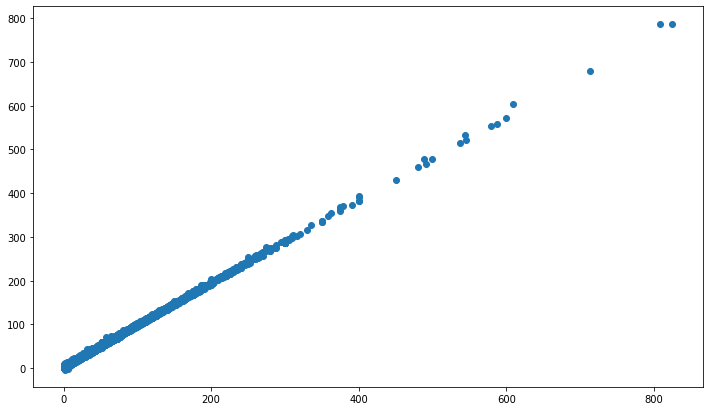

In [ ]:
fig, axs = plt.subplots(figsize = (12,7))
axs.scatter(dftest, dfpred)

## K-means

In [ ]:
cols =  ['passenger_count','RatecodeID','trip_distance','Hours','Month','tip_amount','tolls_amount','total_amount','fare_amount']
for col_name in cols:
    sdf17_21 = sdf17_21.filter(col(col_name).isNotNull())
    print(col_name)

passenger_count
RatecodeID
trip_distance
Hours
Month
tip_amount
tolls_amount
total_amount
fare_amount


In [ ]:
spark = SparkSession.builder.appName("sample_cluster").getOrCreate()

In [ ]:
from pyspark.ml.clustering import KMeans

In [ ]:
# sdf17_21.describe().show()

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
coef_var = ['passenger_count','RatecodeID','trip_distance','Hours','Month','tip_amount','tolls_amount','total_amount','fare_amount']
assembler = VectorAssembler(inputCols= coef_var,
                            outputCol='features')

In [ ]:
output = assembler.transform(sdf17_21)

In [ ]:
final_df = output.select('features')

In [ ]:
final_df.show()

+--------------------+
|            features|
+--------------------+
|[1.0,1.0,1.1,0.0,...|
|[1.0,1.0,0.76,0.0...|
|[2.0,1.0,1.2,0.0,...|
|[3.0,1.0,2.7,0.0,...|
|[2.0,1.0,0.9,0.0,...|
|[4.0,1.0,4.1,0.0,...|
|[1.0,1.0,0.9,0.0,...|
|[1.0,1.0,3.0,0.0,...|
|[1.0,1.0,2.0,0.0,...|
|[1.0,1.0,1.9,0.0,...|
|[2.0,1.0,5.04,0.0...|
|[2.0,1.0,6.5,0.0,...|
|[1.0,1.0,2.6,0.0,...|
|[1.0,1.0,1.42,0.0...|
|[1.0,1.0,1.13,0.0...|
|[3.0,1.0,2.63,0.0...|
|[1.0,1.0,1.7,0.0,...|
|[1.0,1.0,5.5,0.0,...|
|[4.0,1.0,5.1,0.0,...|
|[1.0,1.0,1.2,0.0,...|
+--------------------+
only showing top 20 rows



### Scalling

In [ ]:
from pyspark.ml.feature import StandardScaler

In [ ]:
scaler = StandardScaler(inputCol='features',outputCol='scaledFeatures',withStd=True , withMean=False)

In [ ]:
scaledModel = scaler.fit(final_df)
# https://www.youtube.com/watch?v=9SfO9Khjklk&t=988s [at sec 19.57]

In [ ]:
df_final = scaledModel.transform(final_df)

In [ ]:
df_final.show()

+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|[1.0,1.0,1.1,0.0,...|[0.80519407436853...|
|[1.0,1.0,0.76,0.0...|[0.80519407436853...|
|[2.0,1.0,1.2,0.0,...|[1.61038814873707...|
|[3.0,1.0,2.7,0.0,...|[2.41558222310561...|
|[2.0,1.0,0.9,0.0,...|[1.61038814873707...|
|[4.0,1.0,4.1,0.0,...|[3.22077629747415...|
|[1.0,1.0,0.9,0.0,...|[0.80519407436853...|
|[1.0,1.0,3.0,0.0,...|[0.80519407436853...|
|[1.0,1.0,2.0,0.0,...|[0.80519407436853...|
|[1.0,1.0,1.9,0.0,...|[0.80519407436853...|
|[2.0,1.0,5.04,0.0...|[1.61038814873707...|
|[2.0,1.0,6.5,0.0,...|[1.61038814873707...|
|[1.0,1.0,2.6,0.0,...|[0.80519407436853...|
|[1.0,1.0,1.42,0.0...|[0.80519407436853...|
|[1.0,1.0,1.13,0.0...|[0.80519407436853...|
|[3.0,1.0,2.63,0.0...|[2.41558222310561...|
|[1.0,1.0,1.7,0.0,...|[0.80519407436853...|
|[1.0,1.0,5.5,0.0,...|[0.80519407436853...|
|[4.0,1.0,5.1,0.0,...|[3.22077629747415...|
|[1.0,1.0,1.2,0.0,...|[0.8051940

### Train and Eval

In [ ]:
kmeans = KMeans(featuresCol='scaledFeatures', k=2 ).setSeed(154)
model = kmeans.fit(df_final)

In [ ]:
pred = model.transform(df_final)

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
eval = ClusteringEvaluator()

In [ ]:
silhouette = eval.evaluate(pred)
print(f"Silhouette with squared euclidean distance: {silhouette}")

Silhouette with squared euclidean distance: 0.8867242110535813


In [ ]:
centers = model.clusterCenters()
print("Cluster Centers:")
for center in centers:
    print(center)

Cluster Centers:
[1.29821112 3.18516225 0.54549837 2.23311968 1.8028467  0.56697062
 0.00969901 0.93914637 0.89673972]
[1.32359045 4.95927278 3.49071791 2.22993057 1.84490724 2.6352357
 2.23679619 3.93843377 3.78635056]


In [ ]:
# k=2 Silhourtte with squared euvlidean distance: 0.8871277623490175 Best k
# k=3 Silhourtte with squared euvlidean distance: 0.8871246617171237
# k=4 Silhourtte with squared euvlidean distance: 0.3592091404314106
# k=5 Silhourtte with squared euvlidean distance: 0.3286864377220659

### Plot K-means

In [ ]:
pred.show()

+--------------------+--------------------+----------+
|            features|      scaledFeatures|prediction|
+--------------------+--------------------+----------+
|[1.0,1.0,1.1,0.0,...|[0.80519407436853...|         0|
|[1.0,1.0,0.76,0.0...|[0.80519407436853...|         0|
|[2.0,1.0,1.2,0.0,...|[1.61038814873707...|         0|
|[3.0,1.0,2.7,0.0,...|[2.41558222310561...|         0|
|[2.0,1.0,0.9,0.0,...|[1.61038814873707...|         0|
|[4.0,1.0,4.1,0.0,...|[3.22077629747415...|         0|
|[1.0,1.0,0.9,0.0,...|[0.80519407436853...|         0|
|[1.0,1.0,3.0,0.0,...|[0.80519407436853...|         0|
|[1.0,1.0,2.0,0.0,...|[0.80519407436853...|         0|
|[1.0,1.0,1.9,0.0,...|[0.80519407436853...|         0|
|[2.0,1.0,5.04,0.0...|[1.61038814873707...|         0|
|[2.0,1.0,6.5,0.0,...|[1.61038814873707...|         0|
|[1.0,1.0,2.6,0.0,...|[0.80519407436853...|         0|
|[1.0,1.0,1.42,0.0...|[0.80519407436853...|         0|
|[1.0,1.0,1.13,0.0...|[0.80519407436853...|         0|
|[3.0,1.0,

In [ ]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import ArrayType, DoubleType

def to_array(col):
    def to_array_(v):
        return v.toArray().tolist()
    # Important: asNondeterministic requires Spark 2.3 or later
    # It can be safely removed i.e.
    # return udf(to_array_, ArrayType(DoubleType()))(col)
    # but at the cost of decreased performance
    return udf(to_array_, ArrayType(DoubleType())).asNondeterministic()(col)
lict = [0,2,7,8]
plot=(pred
    .withColumn("Features", to_array(col("scaledFeatures")))
    .select(["prediction"] + [col("Features")[i] for i in lict]))
plot.show()


+----------+------------------+-------------------+------------------+------------------+
|prediction|       Features[0]|        Features[2]|       Features[7]|       Features[8]|
+----------+------------------+-------------------+------------------+------------------+
|         0|0.8051940743685394|0.29037087927538907|0.5063969490778323|0.5164264719033589|
|         0|0.8051940743685394|0.20061988022663244|0.5063969490778323|0.5164264719033589|
|         0|1.6103881487370788|0.31676823193678805| 0.853244174473608|0.6885686292044785|
|         0| 2.415582223105618| 0.7127285218577731|0.9572983420923407|1.0758884831319977|
|         0|1.6103881487370788|0.23757617395259104|0.6902259785375934|0.6024975505539186|
|         0|3.2207762974741576| 1.0822914591173591| 1.398488012795767| 1.334101719083677|
|         0|0.8051940743685394|0.23757617395259104|0.6451358392361426|0.6885686292044785|
|         0|0.8051940743685394| 0.7919205798419702|1.1896859831075102|1.1189240224572776|
|         

In [ ]:
df = plot.toPandas()

Text(0, 0.5, 'Features3')

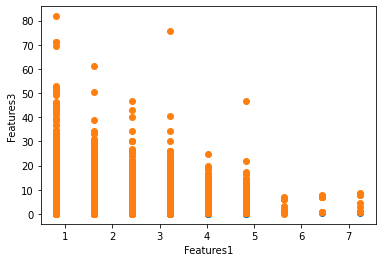

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) #,projection='2d'

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
colors = ['b','indigo', 'c', 'k', 'g', 'm', 'w', 'r', 'y', 'lightgreen']

for clas, color in zip(classes, colors):
    ax.scatter(df.loc[df['prediction'] == clas, 'Features[0]'],
               df.loc[df['prediction'] == clas, 'Features[8]'],)
              #  df.loc[df['prediction'] == clas, 'Features[2]'],)

ax.set_xlabel('Features1')
ax.set_ylabel('Features3')
# ax.set_zlabel('Features3')

Text(0, 0.5, 'Y')

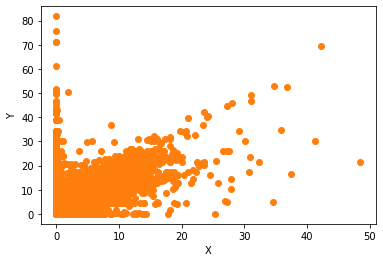

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) #,projection='2d'

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
colors = ['indigo','b', 'c', 'k', 'g', 'm', 'w', 'r', 'y', 'lightgreen']

for clas, color in zip(classes, colors):
    ax.scatter(df.loc[df['prediction'] == clas, 'Features[2]'],
               df.loc[df['prediction'] == clas, 'Features[8]'],)
              #  df.loc[df['prediction'] == clas, 'Features[2]'],)

ax.set_xlabel('X')
ax.set_ylabel('Y')
# ax.set_zlabel('Features3')

Text(0, 0.5, 'Y')

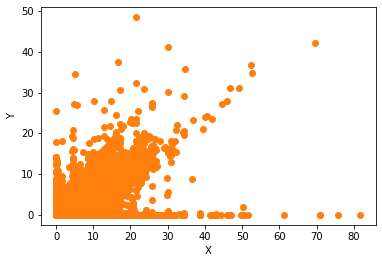

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) #,projection='2d'

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
colors = ['indigo','b', 'c', 'k', 'g', 'm', 'w', 'r', 'y', 'lightgreen']

for clas, color in zip(classes, colors):
    ax.scatter(df.loc[df['prediction'] == clas, 'Features[8]'],
               df.loc[df['prediction'] == clas, 'Features[2]'],)
            #    df.loc[df['prediction'] == clas, 'Features[1]'],)

ax.set_xlabel('X')
ax.set_ylabel('Y')
# ax.set_zlabel('Features3')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) #,projection='2d'

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
colors = ['b','indigo', 'c', 'k', 'g', 'm', 'w', 'r', 'y', 'lightgreen']

for clas, color in zip(classes, colors):
    ax.scatter(df.loc[df['prediction'] == clas, 'Features[7]'],
               df.loc[df['prediction'] == clas, 'Features[8]'],)
              #  df.loc[df['prediction'] == clas, 'Features[2]'],)

ax.set_xlabel('Features1')
ax.set_ylabel('Features3')
# ax.set_zlabel('Features3')

Text(0, 0.5, 'Features3')

Text(0, 0.5, 'Features2')

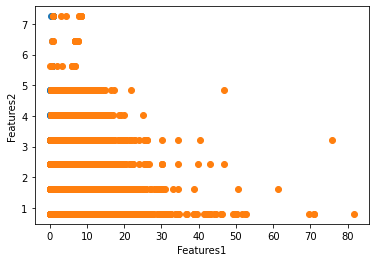

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) #,projection='2d'

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
colors = ['b','indigo', 'c', 'k', 'g', 'm', 'w', 'r', 'y', 'lightgreen']

for clas, color in zip(classes, colors):
    ax.scatter(df.loc[df['prediction'] == clas, 'Features[8]'],
               df.loc[df['prediction'] == clas, 'Features[0]'],)
            #    df.loc[df['prediction'] == clas, 'Features[1]'],)

ax.set_xlabel('Features1')
ax.set_ylabel('Features2')
# ax.set_zlabel('Features3')

In [ ]:
ciu = df.loc[df['prediction'] == 0]
cou = df.loc[df['prediction'] == 1]

In [ ]:
ciu.count()

prediction     6600777
Features[0]    6600777
Features[2]    6600777
Features[7]    6600777
Features[8]    6600777
dtype: int64

In [ ]:
cou.count()

prediction     562753
Features[0]    562753
Features[2]    562753
Features[7]    562753
Features[8]    562753
dtype: int64